# Unsupervised Learning: Trade & Ahead

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 yellowbrick==1.5 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.2 yellowbrick==1.5 -q --user
#!pip install --upgrade -q jinja2

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For capitalizing strings in reports
import string

# For scaling the data using z-score
from sklearn.preprocessing import StandardScaler

# For computing distances
from scipy.spatial.distance import cdist, pdist

# To perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

In [12]:
# Load the training csv file
def csv_read(file):
    """
    Reads a CSV file sample to quickly determine the data types and
    load the full file quicker
    """
    
    # Read the first 20 rows
    df_Sample = pd.read_csv(file, nrows=20)
    dt={}
    
    # Determine the datatypes of the columns from the sample data
    for col, dtyp in zip(df_Sample.columns, df_Sample.dtypes):
        dt[col]=dtyp
    
    # Load the full file using the data types determined in the sample load
    df_Final  = pd.read_csv(file, dtype=dt)
    return df_Final

# Call the csv_read function to load the stock data
df = csv_read('stock_data.csv')

In [13]:
# Display the first 5 rows of the stock data
df.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

In [14]:
# Display the last 5 rows of the stock data
df.tail()

Ticker Symbol                Security             GICS Sector  \
335          YHOO              Yahoo Inc.  Information Technology   
336           YUM         Yum! Brands Inc  Consumer Discretionary   
337           ZBH  Zimmer Biomet Holdings             Health Care   
338          ZION           Zions Bancorp              Financials   
339           ZTS                  Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
335  Internet Software & Services      33.259998     14.887727    1.845149   
336                   Restaurants      52.516175     -8.698917    1.478877   
337         Health Care Equipment     102.589996      9.347683    1.404206   
338                Regional Banks      27.299999     -1.158588    1.468176   
339               Pharmaceuticals      47.919998     16.678836    1.610285   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
335   15         459    -1032187000 -4359082000               -4.64   
336  142          27      159000000  1293000000                2.97   
337    1         100      376000000   147000000                0.78   
338    4          99      -43623000   309471000                1.20   
339   32          65      272000000   339000000                0.68   

     Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
335                   939457327.6   28.976191   6.261775  
336                   435353535.4   17.682214  -3.838260  
337                   188461538.5  131.525636 -23.884449  
338                   257892500.0   22.749999  -0.063096  
339                   498529411.8   70.470585   1.723068

#### Observations:
 * There are 340 rows of data
 * Estimated Shares Outstanding has values listed in scientific notation
 * Column names appear to not have underscore or other characters besides spaces between each word

In [15]:
# Show the number of rows and columns of the dataframe
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')

There are 340 rows and 15 columns


In [16]:
# List the column datatypes and check to see if there are any null values in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

#### Observations:
 * Ticker Symbol, Security, GICS Sector, and GICS Sub Industry are objects
 * Current Price, Price Change, Volatility, Earnings Per Share, Estimated Shares Outstanding, P/E Ratio, and P/B Ratio
   are float data types
 * ROE, Cash Ratio, Net Cash Flow, and Net Income are integer types

In [17]:
# Describe the numerical attributes
df.describe().apply(lambda x: x.apply('{0:,.0f}'.format))

Current Price Price Change Volatility  ROE Cash Ratio    Net Cash Flow  \
count           340          340        340  340        340              340   
mean             81            4          2   40         70       55,537,621   
std              98           12          1   97         90    1,946,365,312   
min               4          -47          1    1          0  -11,208,000,000   
25%              39           -1          1   10         18     -193,906,500   
50%              60            5          1   15         47        2,098,000   
75%              93           11          2   27         99      169,810,750   
max           1,275           55          5  917        958   20,764,000,000   

            Net Income Earnings Per Share Estimated Shares Outstanding  \
count              340                340                          340   
mean     1,494,384,603                  3                  577,028,338   
std      3,940,150,279                  7                  845,849,595   
min    -23,528,000,000                -61                   27,672,157   
25%        352,301,250                  2                  158,848,216   
50%        707,336,000                  3                  309,675,138   
75%      1,899,000,000                  5                  573,117,457   
max     24,442,000,000                 50                6,159,292,035   

      P/E Ratio P/B Ratio  
count       340       340  
mean         33        -2  
std          44        14  
min           3       -76  
25%          15        -4  
50%          21        -1  
75%          32         4  
max         528       129

#### Observations: 
 * Current price is right skewed with a minimum of 4 and maximum of 1275
 * Price Change can be negative and positive
 * 50% of stocks have a low volatility of 1
 * ROE is right skewed with a minimum of 1 and a maximum of 917
 * Cash Ratio is right skewed with a minimum of 0 and maximum of 958
 * Net Cash Flow can be negative and positive
 * Net Income is left skewed with a minumum of ~-11 bilion and maximum of ~20 billion
 * Half of stocks have an EPS between 2 and 5. The minimum is -61 and maximum is 50
 * Estimated Shares Outstanding is right skewed with a minimum of ~27 thousand and maximum of ~6 billion
 * P/E Ratios are right skewed with a minimum of 3 and a maximum of 528
 * P/B Ratios are right skewed with a mimumum of -76 and a maximum of 129

In [18]:
# Provide information on attributes
# Show name, number of missing values, unique value count, and unique value list if count less than 20
for i in df.columns:
    print('Attribute: {}'.format(i))
    print('Number of missing values: {}'.format(sum(df[i].isna())))
    print('Unique values: {}'.format(df[i].nunique()))
    if df[i].nunique() < 20:
        print('Value list:')
        df_unique=df[i].unique()
        print(np.sort(df_unique))
    else:
        print('Too many unique values to list')
    print('-'*100)

Attribute: Ticker Symbol
Number of missing values: 0
Unique values: 340
Too many unique values to list
----------------------------------------------------------------------------------------------------
Attribute: Security
Number of missing values: 0
Unique values: 340
Too many unique values to list
----------------------------------------------------------------------------------------------------
Attribute: GICS Sector
Number of missing values: 0
Unique values: 11
Value list:
['Consumer Discretionary' 'Consumer Staples' 'Energy' 'Financials'
 'Health Care' 'Industrials' 'Information Technology' 'Materials'
 'Real Estate' 'Telecommunications Services' 'Utilities']
----------------------------------------------------------------------------------------------------
Attribute: GICS Sub Industry
Number of missing values: 0
Unique values: 104
Too many unique values to list
----------------------------------------------------------------------------------------------------
Attribute: Curre

#### Observations:
 * There are no missing values in the columns
 * GICS Sector has 11 categories: Consumer Discretionary, Consumer Staples, Energy, Financials, Health Care, Industrials, Information Technology, Materials, Real Estate, Telecommunications Services, and Utilities

In [19]:
# Check the dataframe for duplicate records
df.duplicated().sum()

0

#### Observations:
 * There are no duplicate records

## Exploratory Data Analysis (EDA)

In [27]:
# Define function to create a histogram and box plot for an attribute
def hist_box_plots(df, col):
    """
    Create a histogram and bookplot of the column and dataframe provided
    
    df: dataframe
    col: dataframe column
    """
    
    # Create the plot figure
    plt.figure(figsize=(12,3))
    
    ################################################
    
    # Creating first subplot
    plt.subplot(1,2,1) 
    
    # Add title and labels     
    plt.title(col.replace('_',' '), fontsize=12, pad=20, loc='left')  
    plt.xlabel(col.replace('_',' '), fontsize=10, labelpad=5)
    plt.ylabel('Record Count', fontsize=10, labelpad=10)
    
    # Set tick font sizes
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    
    # Create a histogram of the attribute
    ax = sns.histplot(data = df, x=col, color='#CCECFF')
    
    # Hide the top and left spines of the histogram
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add a mean to the histogram
    ax.axvline(df[col].mean(), color='green', linestyle='--')
    
    # Add median to the histogram
    ax.axvline(df[col].median(), color='red', linestyle='-')
        
    ################################################    
    
    # Create second box plot next to first boxplot
    plt.subplot(1,2,2)
                
    # Set the flier type, color, and size of the outliers            
    flierprops = dict(marker='o', markerfacecolor='Red', markersize='9')
                
    # Add an x-axis label            
    plt.xlabel(col.replace('_',' '), fontsize=10, labelpad=5,)
                
    # Set the tick font size            
    plt.xticks(fontsize=10)
                
    # Create a boxplot of the attribute            
    ax = sns.boxplot(data = df, x=col, showmeans=True, flierprops=flierprops, color='#CCECFF')
                
    # Hide the top, right, and left spines            
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Show the plot
    plt.show()
    
    # Print and line after the graphs to delineate between multiple calls
    print('_'*122)

In [28]:
# Define function to create a bar plot for an attribute and a possible column value for another attribute
def bar_plots(data, col, subset=None):
    """
    Create a bar plot of the column and dataframe provided
    
    data: dataframe
    col: dataframe column
    subset: a categorical value from a column
    """
    
    # For each value in the list of categories, create a bar chart
    
    # If there are less than 8 unique values in the attribute, set the size to 4 by 3
    # else set the size to 9 by 3 to show all values cleaner
    if data[col].nunique() < 8:
        plt.figure(figsize=(8,3))
    else: 
        plt.figure(figsize=(9,3))
    
    # Create the bar plot of the dataframe and all attributes individually
    # Order the each subplot by the x-axis data xtick names
    ax = sns.countplot(data=data,
                       x=col,
                       color='#CCECFF',
                       linewidth=.5, edgecolor='black',
                       order = data[col].value_counts().index.sort_values())
    
    # Add title and labels   
    if subset==None:
        plt.title(col.replace('_',' '), fontsize=12, pad=10, loc='left')
    else:
        plt.title(col.replace('_',' ')+          
                  ' and ' +subset, 
                  fontsize=12, pad=10, loc='left')   
    plt.xlabel(col.replace('_',' '), fontsize=10, labelpad=5,)
    plt.ylabel('Record Count', fontsize=10, labelpad=5)

    # If there is less than 20 unique values for the attribute, do not rotate the x-tick label
    # else rotate the x-tick label by 90 degrees for readability
    total = len(data[col])  # length of the column

    # Add percentage labels for each bar
    for p in ax.patches:
        label= '{:.1f}%'.format(p.get_height()/total*100) # include the bar value
        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
        ax.annotate(
                label,
                (x, y),
                ha="center",
                va="center",
                size=8,
                xytext=(0, 5),
                textcoords="offset points",
                )  # annotate the percentage
    
    # Set the xtick parameters
    if data[col].nunique() < 20:
        plt.xticks(rotation=45, fontsize=8) 
    else:
        plt.xticks(rotation=90, fontsize=6)               
    plt.yticks(fontsize=8)
    
    # Tighten the layout of the subplots
    plt.tight_layout()    
    
    # Hide the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Show the plot
    plt.show()
    
    # Print and line after the graphs to delineate between multiple calls
    print('_'*122)

### Univariate Analysis

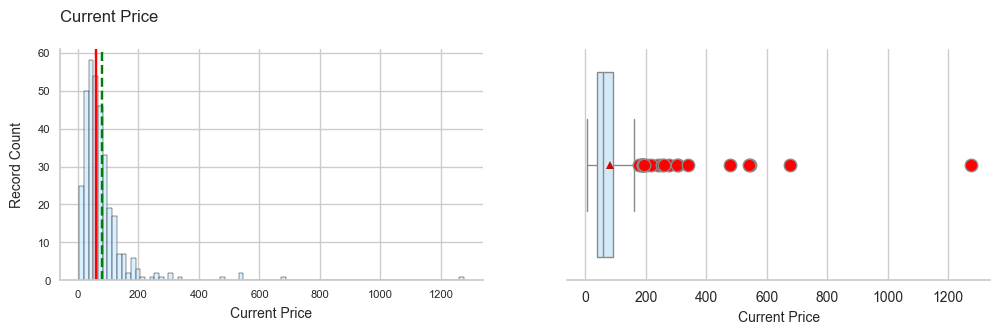

__________________________________________________________________________________________________________________________


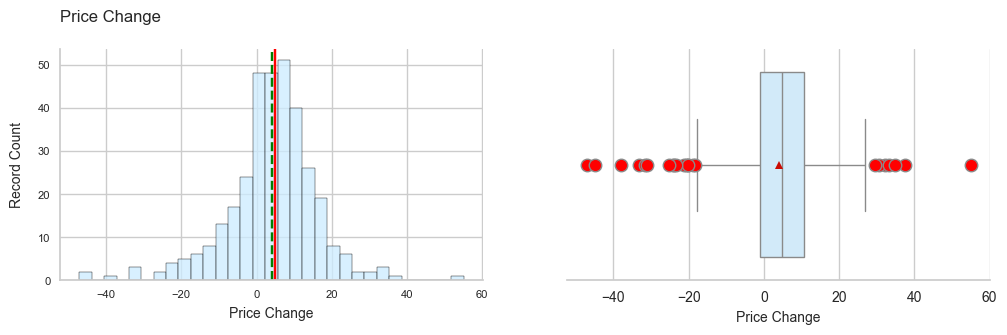

__________________________________________________________________________________________________________________________


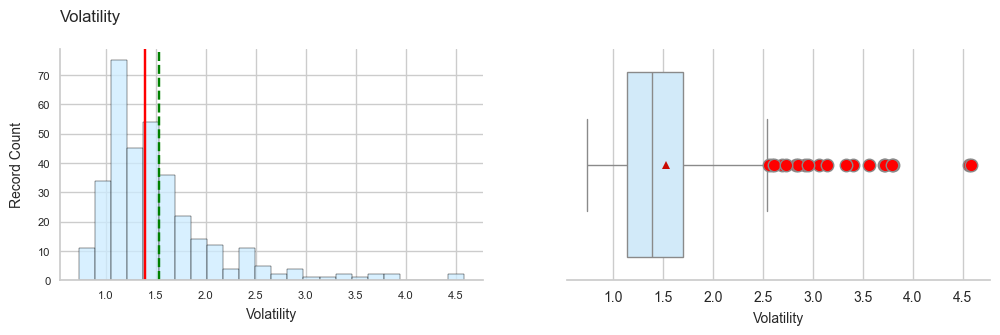

__________________________________________________________________________________________________________________________


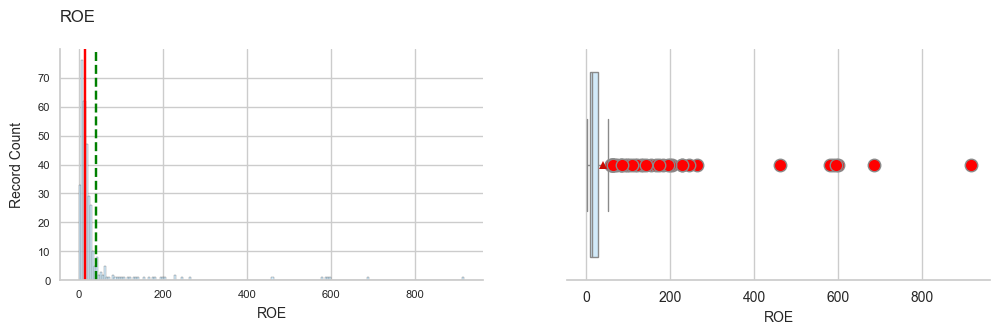

__________________________________________________________________________________________________________________________


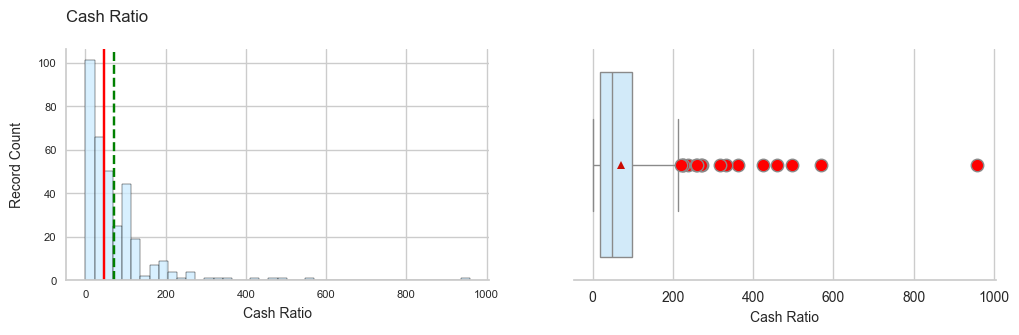

__________________________________________________________________________________________________________________________


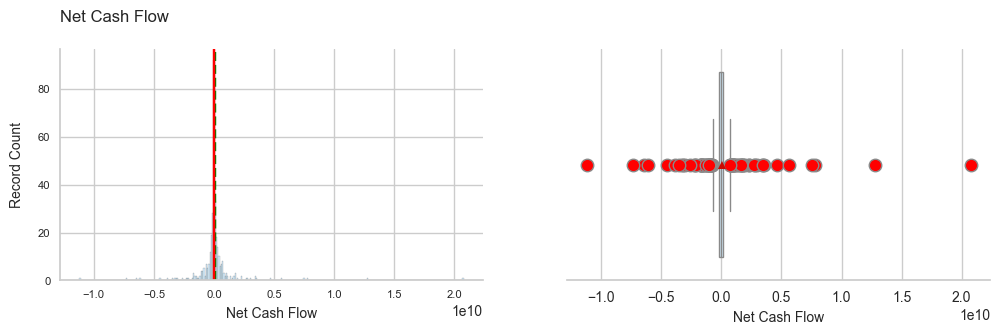

__________________________________________________________________________________________________________________________


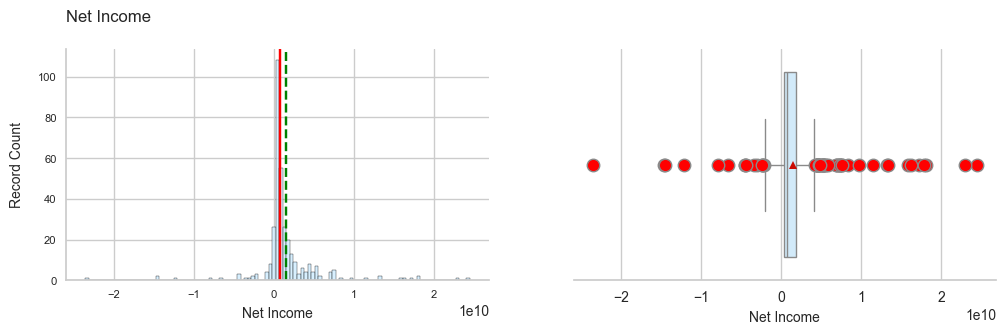

__________________________________________________________________________________________________________________________


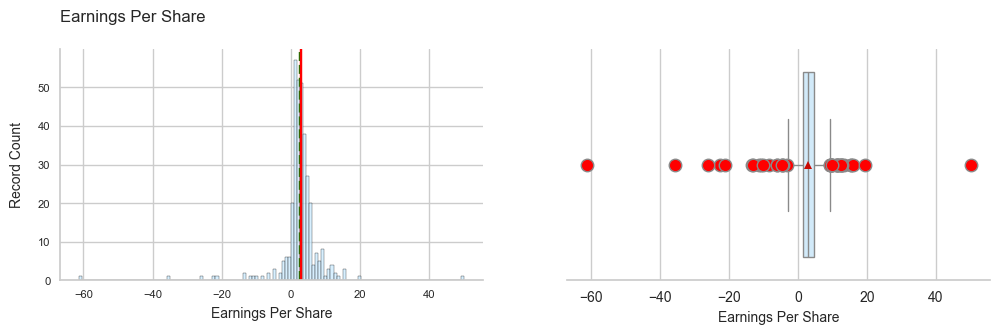

__________________________________________________________________________________________________________________________


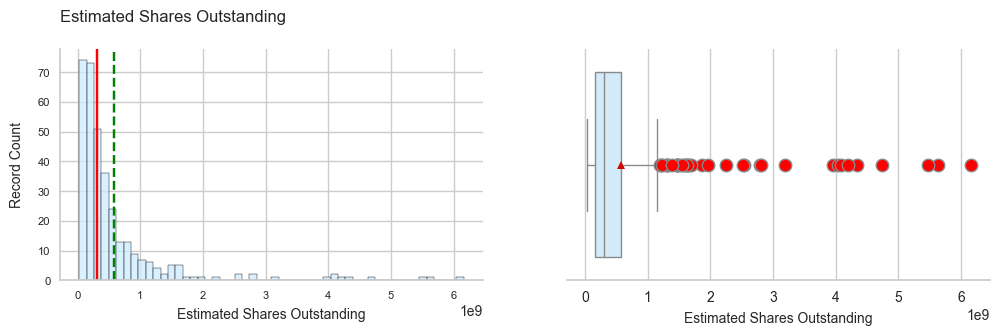

__________________________________________________________________________________________________________________________


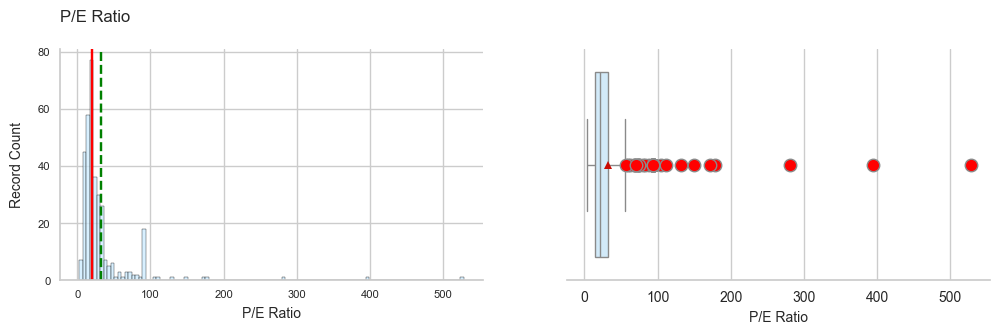

__________________________________________________________________________________________________________________________


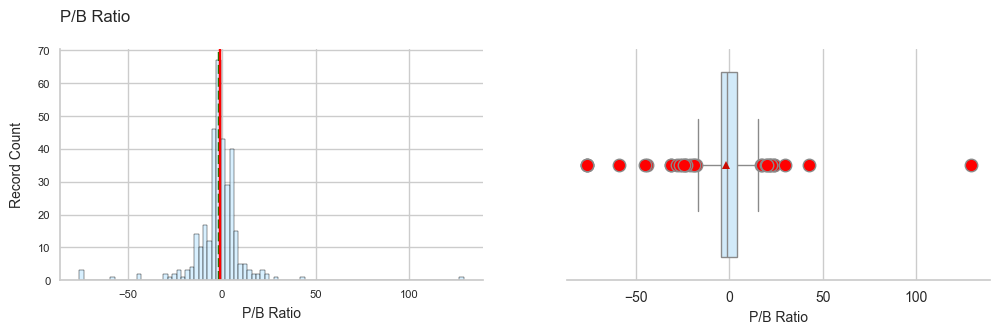

__________________________________________________________________________________________________________________________


In [29]:
# Create histograms and box plots for numerical attributes with many values 

# Create a list of the numerical attributes
df_num_list = [df.columns[x] for x in range(len(df.columns)) 
               if df.dtypes[x] in ('float64', 'int64')]

for col in df_num_list:
    hist_box_plots(df, col)   

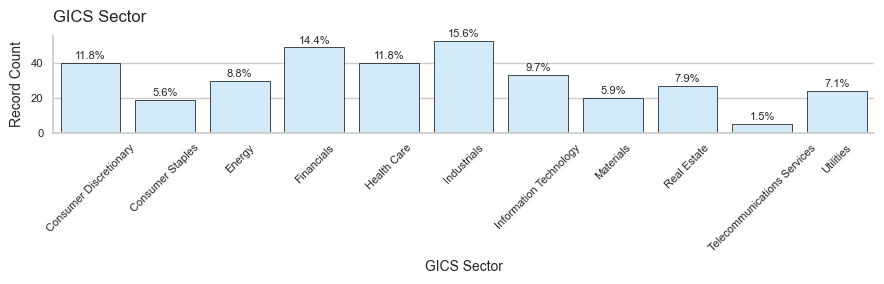

__________________________________________________________________________________________________________________________


In [30]:
# Create bar plots for other attributes
                  
# Create a list of the attributes
df_cat_list = df.columns.tolist()                

# Call the bar_plot function for each item in the list
for col in df_cat_list:
    if df[col].nunique() <= 32:
        bar_plots(df, col)   

#### Observations:
 * Current Price is right skewed. Most prices fall within 4 and ~170 with outliers out to 1275
 * Prince Change is similar to a normal distribution with longer tails on both ends
 * Volatility is right skewed. Most values fall between 1 and ~2.5 with outliers out to 4.5
 * ROE is right skewed. Most observations fall between 1 and ~30 with outliers out to 917
 * Cash Ratio is right skewed. Most prices are between 0 and ~200 with outliers out to 958 
 * Net Cash Flow is similar to a normal distribution except there are extreme outliers on both ends. Most stocks have a net cash flow between -200,000 and 200,000. The outliers range from -11 billion on the left side to 20 billion on the right side
 * Net Income is similar to a normal distribution except there are extreme outliers on both ends. Most stocks have a net income between -2 billion and 2 billion. The outliers range from -23 billion on the left side to 24 billion on the right side
 * Earnings Per Share is similar to a normal distribution except there are extreme outliers on both ends. Most stocks have an earnings per share between -5 and 15. The outliers range from -61 on the left side to 50 on the right side
 * Estimated Shares Outstanding is right skewed. Most shares outstanding fall beween 50 and 900,000 with outliers out to 6 million shares
 * The P/E Ratio is right skewed. Most P/E ratios fall between 10 an 60 with outliers out to 528
 * The P/B Ratio is similar to a normal distribution except there are extreme outliers on both ends. Most P/B ratios are between -20 and 20. The ouliers range from -76 on the left side to 129 on the right side
 * There appears to be some stocks that are highly volatile as indicated by the outliers in price change and volatility
 * The GICS Sector percentage split between the companies is mostly between 7% and 12%. Industrials has the most stocks at 15.6% and Telecommunications Services has the least stocks at 1.5%

### Bivariate Analysis

In [36]:
# Create a heatmap of the correlation of the numerical attributes
def heatmap_plt(data):
    
    # Create labels for the heatmap x and y labels
    labels = []
    df_num_list = [data.columns[x] for x in range(len(data.columns)) 
               if data.dtypes[x] in ('float64', 'int64')]
    for i in df_num_list:
        x = i.replace('_',' ').split()
        labels.append(' '.join(word[:].capitalize() for word in x))

    # Correlate the numerical attributes    
    df_corr = data[df_num_list].corr()

    plt.figure(figsize=(8,8))

    # Create the heatmap
    ax = sns.heatmap(df_corr, cbar=True, annot=True, vmin=-1, vmax=1, fmt=".2f",
                     xticklabels=labels,
                     yticklabels=labels,
                     cmap='Blues'
                    )

    # Add title
    plt.title('Heatmap: Numerical Attributes')

    # Show plot
    plt.show()

In [37]:
# Create bivariate box plot for one categorical attribute and one numerical attribute
# A subset categorical value of another attribute can be added
def boxplot_by_cat_and_num_att(data, att, col, subset=None):
    """
    Create bivariate box plots for one categorical attribute and one numerical attributes
    
    data: dataframe
    att: categorical attribute
    col: numerical column
    subset: a categorical value from a column
    """
    
    # Create the box plot figure
    plt.figure(figsize=(14,4))
    
    # Set the flier type, color, and size of the outliers 
    flierprops = dict(marker='o', markerfacecolor='Red', markersize='9')
    
    # Create a boxplot of the attribute  
    ax = sns.boxplot(data=data, x=att, y=col,
                     showmeans=True,
                     flierprops=flierprops,
                     color='#CCECFF',
                     order = data[att].value_counts().index.sort_values()
                     )
    
    # Add title and labels
    if subset==None:
        plt.title(col.replace('_',' ')+
                  ' by ' +att.replace('_',' '), 
                  fontsize=12, pad=10)
    else:
        plt.title(col.replace('_',' ')+
                  ' by ' +att.replace('_',' ')+
                  ' and ' +subset, 
                  fontsize=12, pad=10)
    plt.xlabel(att.replace('_',' '), fontsize=10, labelpad=5)
    plt.ylabel(col.replace('_',' '), fontsize=10, labelpad=5)
    
    # If there is less than 20 unique values for the attribute, do not rotate the x-tick label
    # else rotate the x-tick label by 90 degrees for readability
    if data[att].nunique() < 20:
        plt.xticks(rotation=45, fontsize=8) 
    else:
        plt.xticks(rotation=90, fontsize=8)               
    
    # Show the plot
    plt.show()

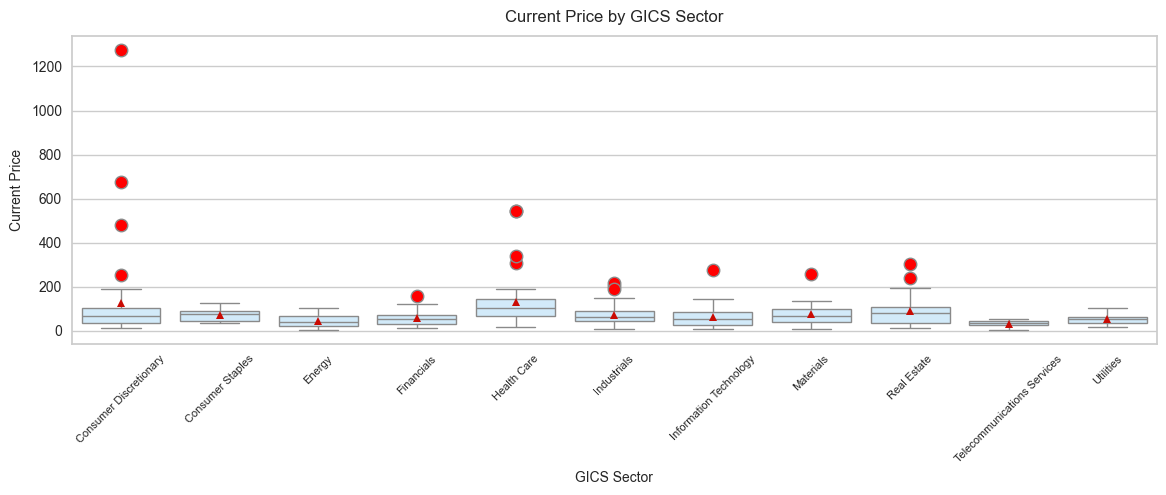

__________________________________________________________________________________________________________________________


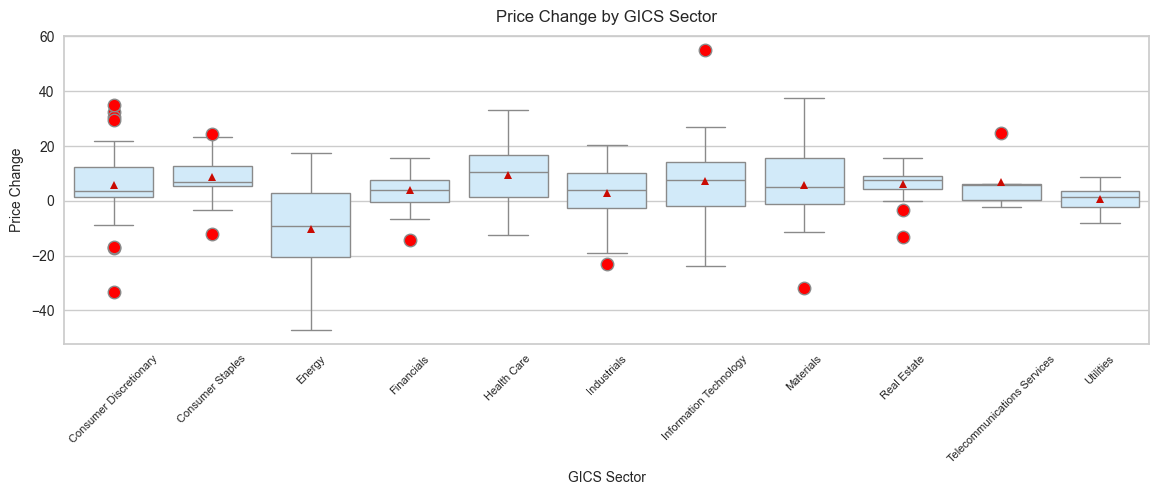

__________________________________________________________________________________________________________________________


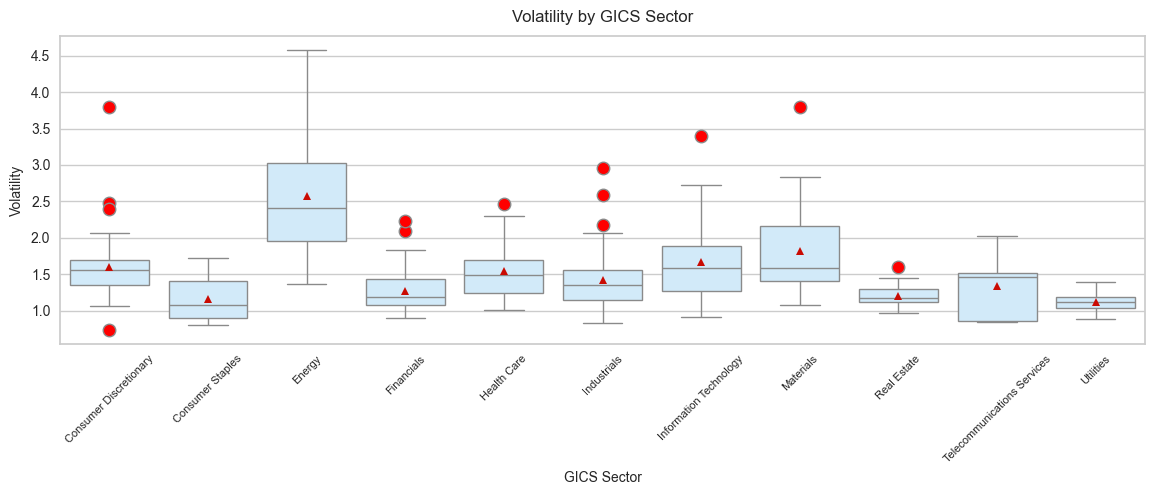

__________________________________________________________________________________________________________________________


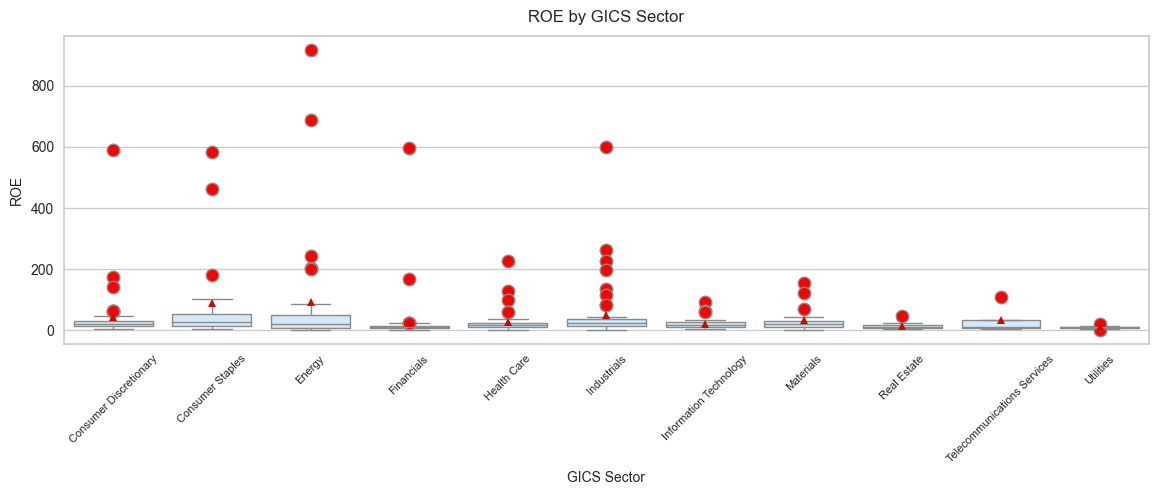

__________________________________________________________________________________________________________________________


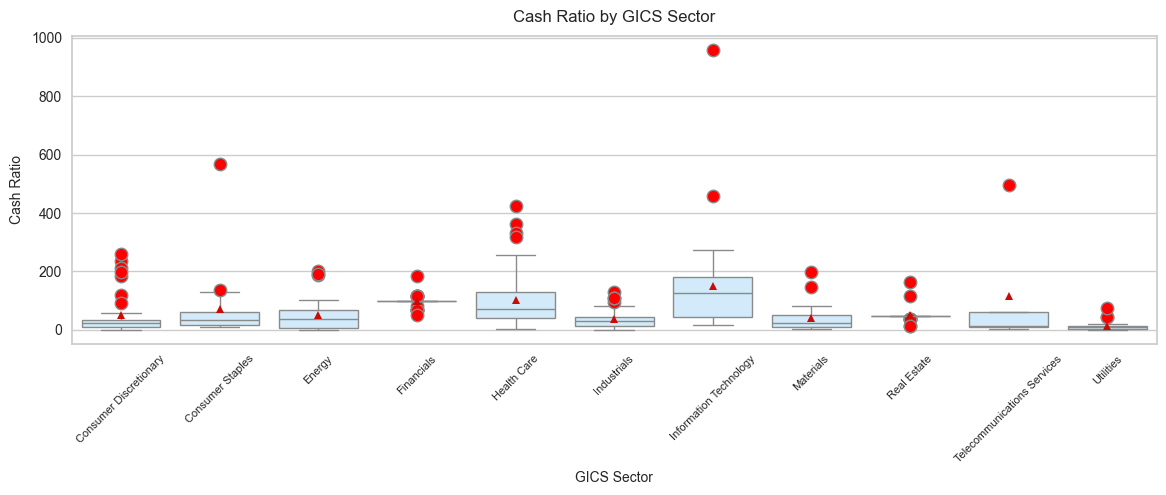

__________________________________________________________________________________________________________________________


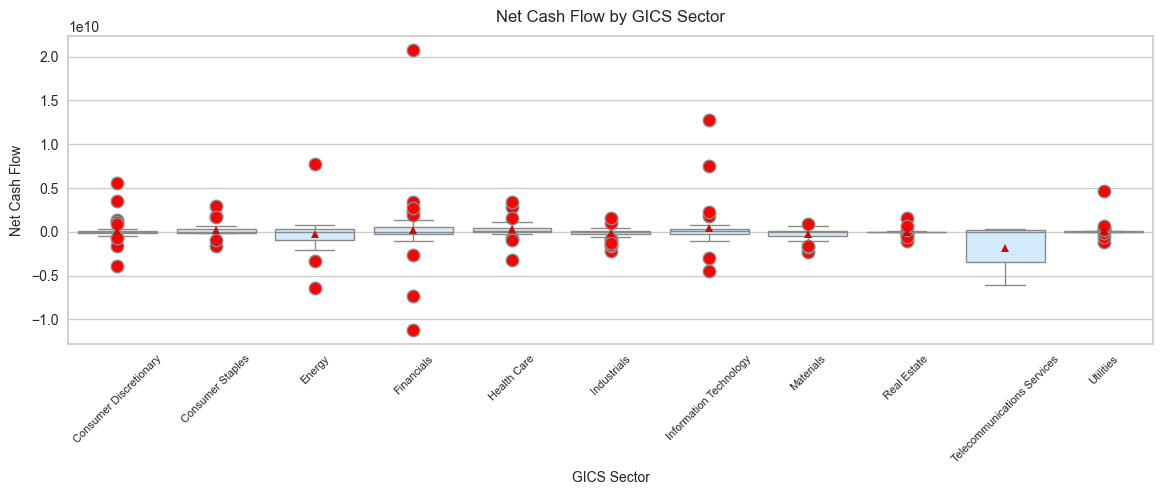

__________________________________________________________________________________________________________________________


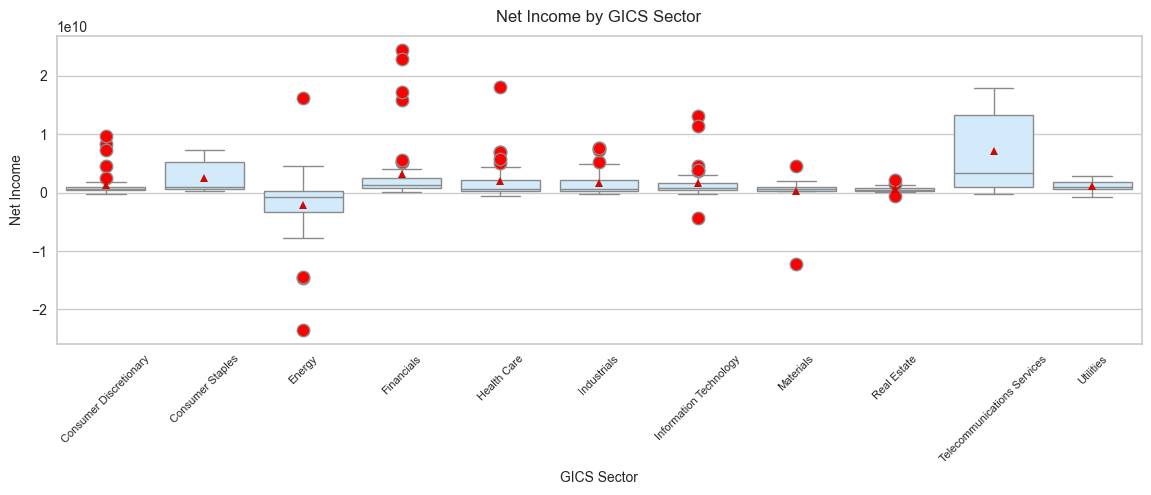

__________________________________________________________________________________________________________________________


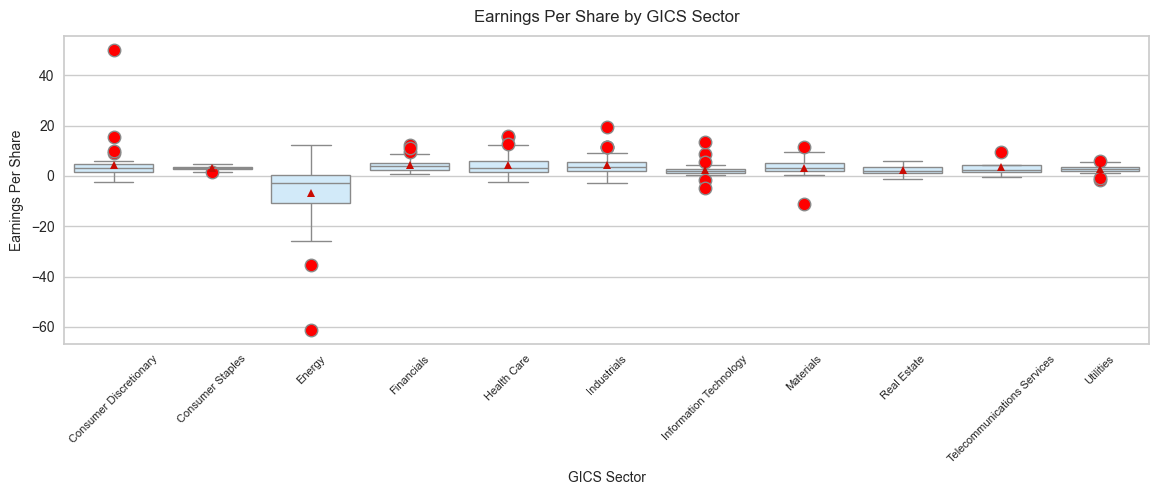

__________________________________________________________________________________________________________________________


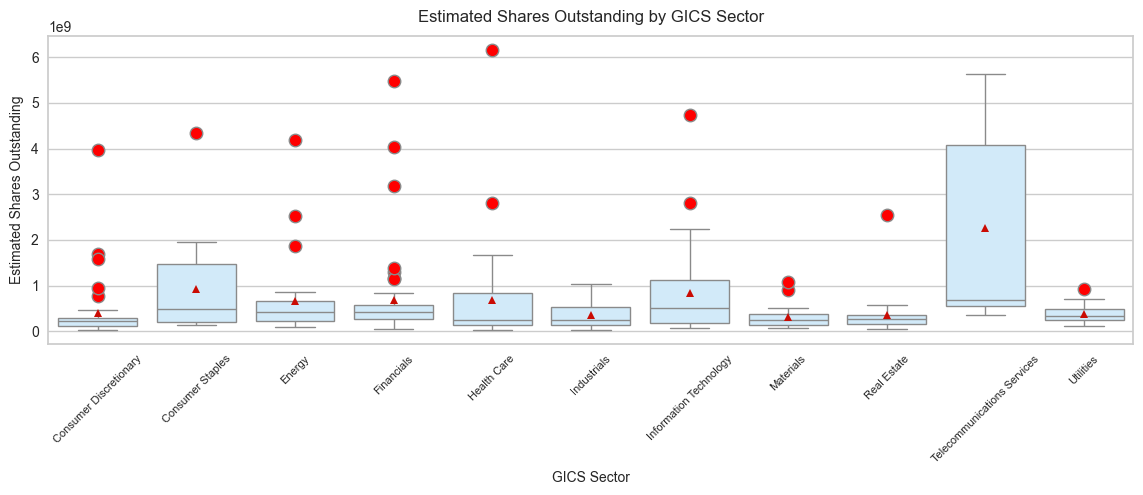

__________________________________________________________________________________________________________________________


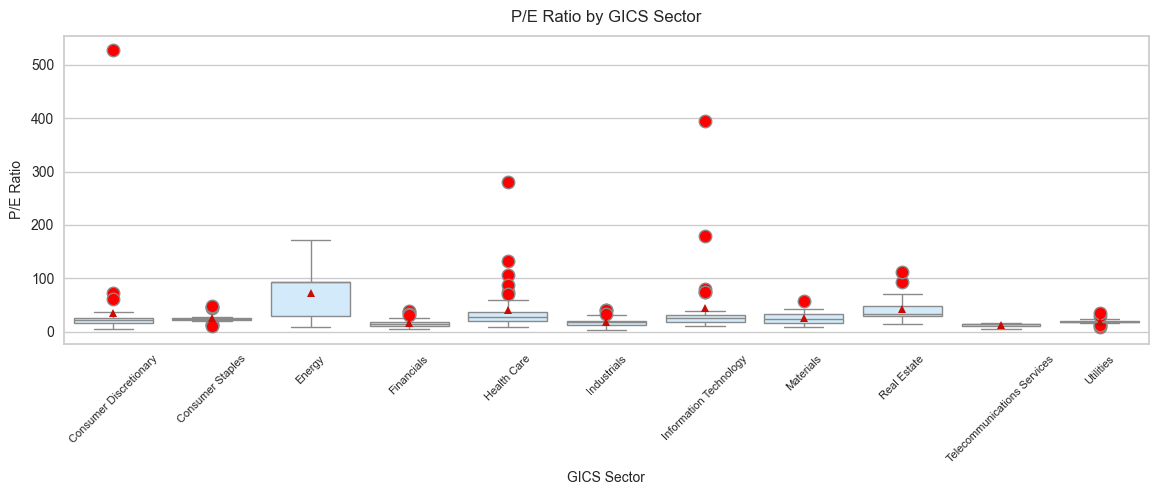

__________________________________________________________________________________________________________________________


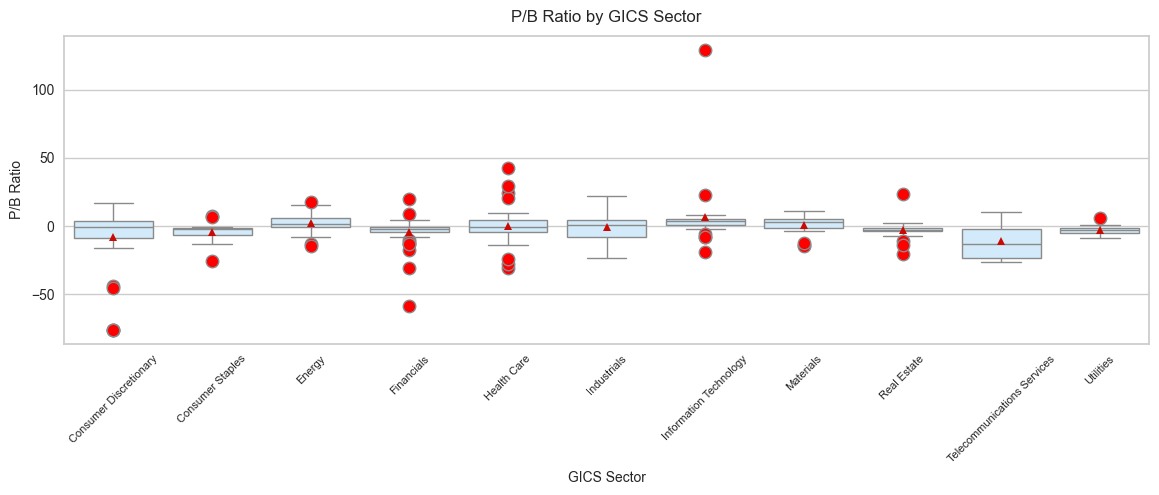

__________________________________________________________________________________________________________________________


In [38]:
# Create box plots for the listed numerical attributes by GICS Sector
for col in df_num_list:
    boxplot_by_cat_and_num_att(df, 'GICS Sector', col)
    print('_'*122)

#### Observations:
 * Consumer discretionary and health care stocks have the largest outliers
 * Telecommunication services have the lowest current prices
 * Energy stocks have the widest range of price changes and volatility
 * ROE is relatively the same between sectors 
 * Health care and information technology stocks have the widest range of cash ratios
 * Telecommunication services have negative net cash flows for the stocks
 * Telecommunication services have positive net income for the stocks
 * Energy have a wider and lower range of earnings per share than other sectors
 * Telecommunication services have the largest range of estimated shares outstanding than other sectors
 * Energy stocks have the higher P/E ratios than other sectors
 * P/B ratios are relatively the same between sectors

### Question 1:What does the distribution of stock prices look like?

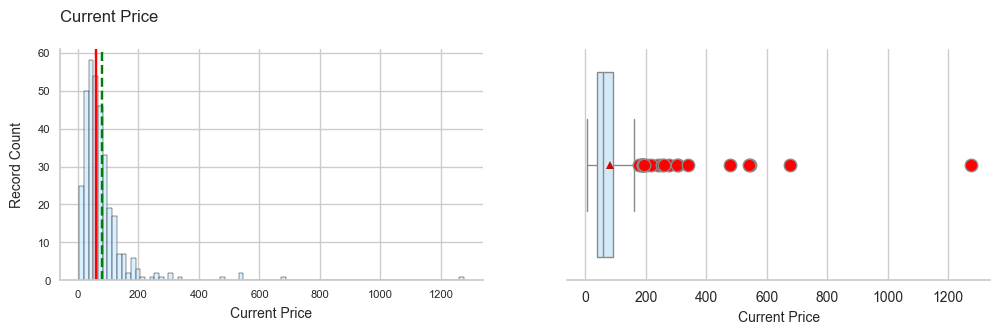

__________________________________________________________________________________________________________________________


In [39]:
hist_box_plots(df, 'Current Price') 

#### Observation:
 * Current Price is right skewed. Most prices fall within 4 and ~170 with outliers out to 1275

### Question 2: The stocks of which economic sector have seen the maximum price increase on average?

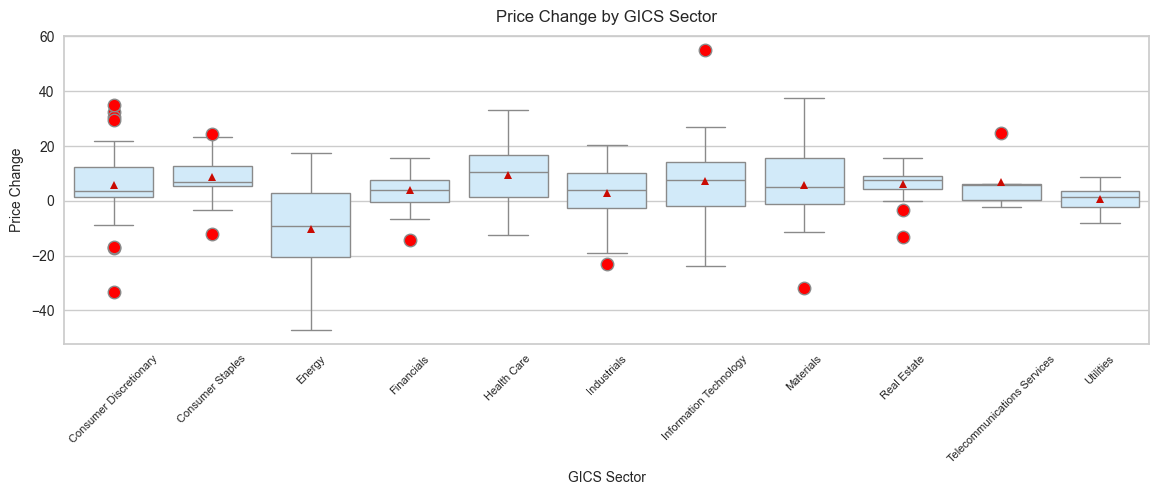

In [40]:
boxplot_by_cat_and_num_att(df, 'GICS Sector', 'Price Change')

In [41]:
df_avg_price = df.groupby(['GICS Sector'])['Price Change'].mean()
print('The economic sector with the maximum average price increase is {} with a percent increase of {:.2f}%'
       .format(df_avg_price.idxmax(), df_avg_price.max()))

The economic sector with the maximum average price increase is Health Care with a percent increase of 9.59%


### Question 3: How are the different variables correlated with each other?

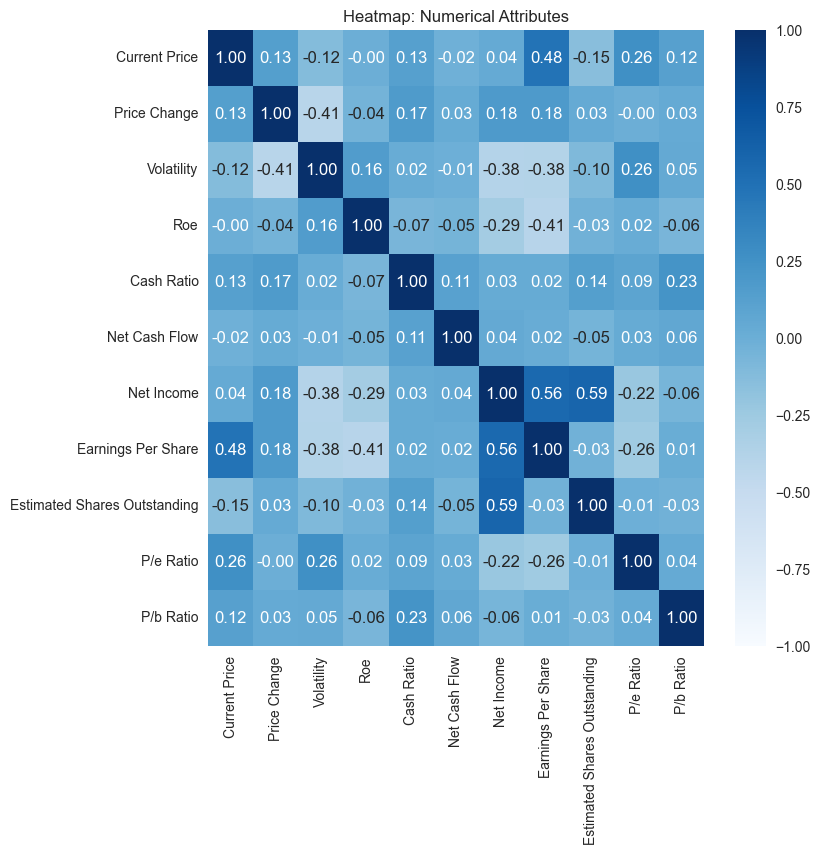

In [42]:
# Create a heatmap of the correlation of the numerical attributes
heatmap_plt(df)

#### Observations:
 * There are no attributes showing a very high correlation (+0.70) where one would be removed for clustering purposes
 * The is high correlation between the following attributes:
     - Earnings Per Share and Net Income (0.56)
     - Estimated Shares Outstanding and Net Income (0.59)
     
 * There is moderate correlation between tbe following attributes:
     - Volatility and Price Change (-0.41)
     - Net Income and Volatility (-0.38)
     - Earnings Per Share and Current Prince (0.48)
     - Earnings Per Share and Volatility (-0.41)
     - P/E Ratio and Current Price (0.36)

 * There is low correlation between the following attributes:
     - Net Income and Price (-0.29) 
     - P/E Ratio and Volatity (0.26)
     - P/E Ratio and Net Income (-0.22)
     - P/E Ratio and Earnings Per Share (-0.26)
     - P/B Ratio and Cash Ratio (0.23)     

### Question 4: Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

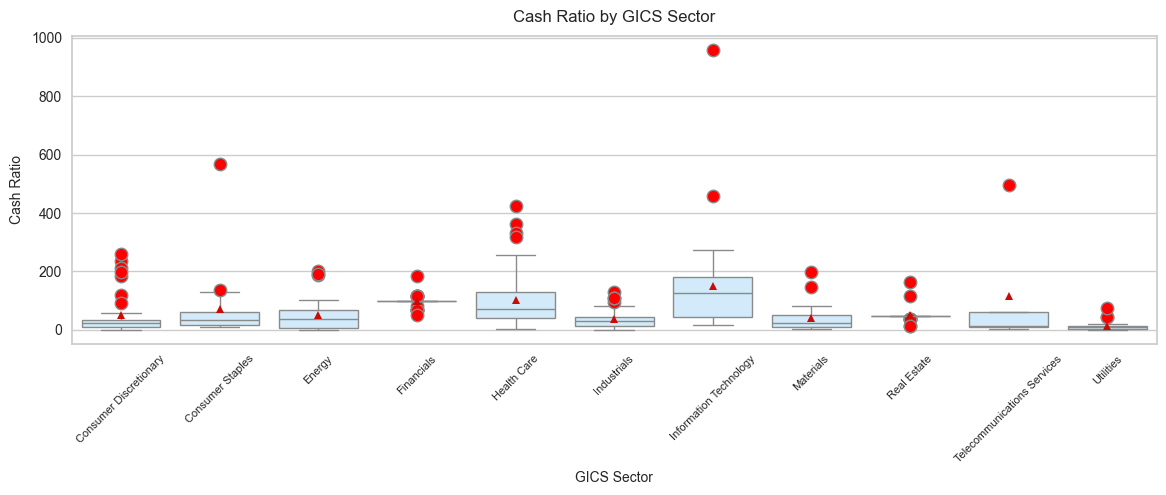

In [43]:
boxplot_by_cat_and_num_att(df, 'GICS Sector', 'Cash Ratio')

In [44]:
df_avg_cash_ratio = df.groupby(['GICS Sector'])['Cash Ratio'].mean()
df_avg_cash_ratio.sort_values()

GICS Sector
Utilities                       13.625000
Industrials                     36.188679
Materials                       41.700000
Consumer Discretionary          49.575000
Real Estate                     50.111111
Energy                          51.133333
Consumer Staples                70.947368
Financials                      98.591837
Health Care                    103.775000
Telecommunications Services    117.000000
Information Technology         149.818182
Name: Cash Ratio, dtype: float64

#### Observations:
 * The average cash ratio ranges from 13.6 for Utilities to 149.8 for Information Technology
 * For ratio binning:
     - Utilities is separate at 13.6
     - Industrials, Materials, Consumer Discretionary, Real Estate, and Energy fall within 36 to 51
     - Consumer Staples is separate at 70.9
     - Financials, Health Care, and Telecommunications Services fall within 98.6 and 117
     - Information Technology is separate at 149.8
     

### Question 3: P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

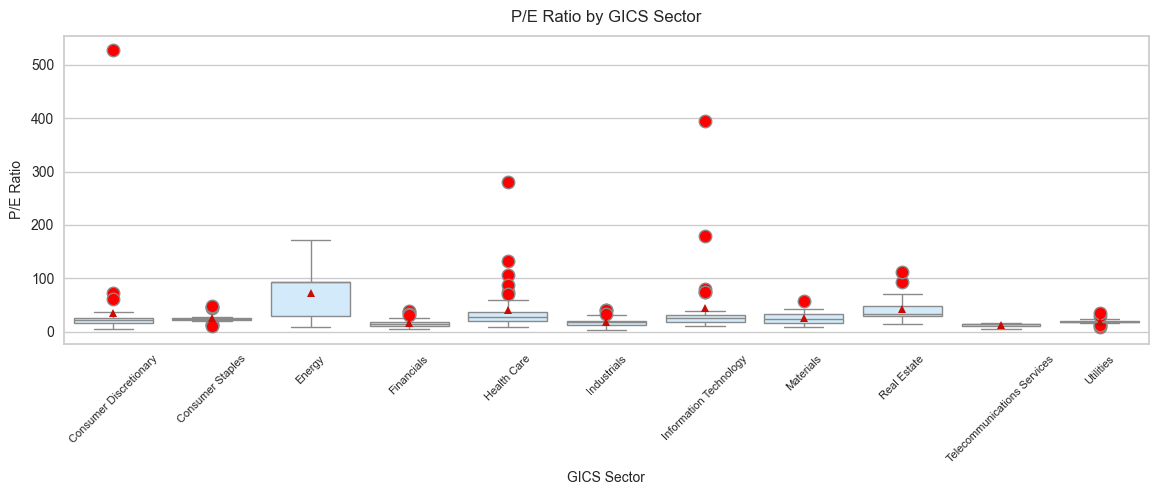

In [45]:
boxplot_by_cat_and_num_att(df, 'GICS Sector', 'P/E Ratio')

In [46]:
df_avg_cash_ratio = df.groupby(['GICS Sector'])['P/E Ratio'].mean()
df_avg_cash_ratio.sort_values()

GICS Sector
Telecommunications Services    12.222578
Financials                     16.023151
Industrials                    18.259380
Utilities                      18.719412
Materials                      24.585352
Consumer Staples               25.521195
Consumer Discretionary         35.211613
Health Care                    41.135272
Real Estate                    43.065585
Information Technology         43.782546
Energy                         72.897709
Name: P/E Ratio, dtype: float64

#### Observations:
 * The average P/E ratio ranges from 12.2 for Telecommunications Services to 72.9 for Energy
 * For P/E ratio binning:
     - Telecommunications Services, Financials, Industrials, and Utilities fall within 12.2 and 18.7
     - Materials and Consumer Staples fall within 24.6 and 25.2
     - Consumer Discretionary is separate at 35.2
     - Health Care, Real Estate, and Information Technology fall within 41.1 and 43.8
     - Energy is separate at 72.9

## Data Preprocessing

### Duplicate Value Check

In [47]:
# Check the dataframe for duplicate records
df.duplicated().sum()

0

#### Observations:
 * The are zero duplicate records

### Missing Value Check

In [48]:
# Check the dataframe for missing values
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

#### Observations:
 * There are no missing values 

### Outlier Detection

In [49]:
# Create a new numerical column list from the df_Inn_Copy data
df_num_list = [df.columns[x] for x in range(len(df.columns)) 
               if df.dtypes[x] in ('float64', 'int64')]

In [50]:
# Define function to find the outliers of an attribute
def define_outlier(df, col):
    """
    Define the IQR formula and determine which loaded records are for a columns are outliers
    
    df: datafame
    col: column name
    """
    
    # Define the Q1, Q2, and IQR values to determine outlier range
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    
    # Determine if a record is an outlier for either the upper or lower whiskers
    # Assign the records a boolean value 
    BM = (df[col]>(Q3+1.5*IQR)) | (df[col]<(Q1-1.5*IQR))
    
    # Return the dataframe boolean values
    return df[BM]

In [51]:
# Define function to find the outliers in a dataframe
def find_outliers(data):
    """
    Find all the numerical outliers in the dataframe
    
    data = dataframe
    """
    
    # Print the number of rows in the dataframe
    print('Total rows:{}'.format(data.shape[0]))
    print('Number of Outliers:')
    print('-'*45)
    
    # Cycle through the numerical columns in the df_num_list list
    for cols in df_num_list:
        
        # Call the define_outlier function to determine which records for a column are outliers
        # Save the outliers in the df_OM dataframe
        df_OM = define_outlier(data, cols)
        
        # Print the column name, number of outliers, and percent of outliers to the total records
        print('{:<40}: {:<5}   Percent:{}%'.format(
            cols,df_OM[cols].count(), round(df_OM[cols].count()/data.shape[0]*100,1)))

In [52]:
# Call the find_outliers function for the dataframe
find_outliers(df)

Total rows:340
Number of Outliers:
---------------------------------------------
Current Price                           : 22      Percent:6.5%
Price Change                            : 23      Percent:6.8%
Volatility                              : 20      Percent:5.9%
ROE                                     : 39      Percent:11.5%
Cash Ratio                              : 16      Percent:4.7%
Net Cash Flow                           : 76      Percent:22.4%
Net Income                              : 57      Percent:16.8%
Earnings Per Share                      : 39      Percent:11.5%
Estimated Shares Outstanding            : 35      Percent:10.3%
P/E Ratio                               : 41      Percent:12.1%
P/B Ratio                               : 30      Percent:8.8%


#### Observations:
 * Outliers will not be removed or cleaned as these could be useful in determining clusters

### Preprocessing

In [53]:
# Scale the data set before clustering
scaler = StandardScaler()
subset = df[df_num_list].copy()
subset_scaled = scaler.fit_transform(subset)

In [54]:
# Create a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [55]:
# Show the first 5 rows
subset_scaled_df.head()

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net Cash Flow  Net Income  Earnings Per Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                      0.107863  -0.652487  -0.506653  
1                      1.250274  -0.311769  -0.504205  
2                      1.098021  -0.391502   0.094941  
3                     -0.091622   0.947148   0.424333  
4                      1.978399   3.293307   0.199196

## EDA

- It is a good idea to explore the data once again after manipulating it.

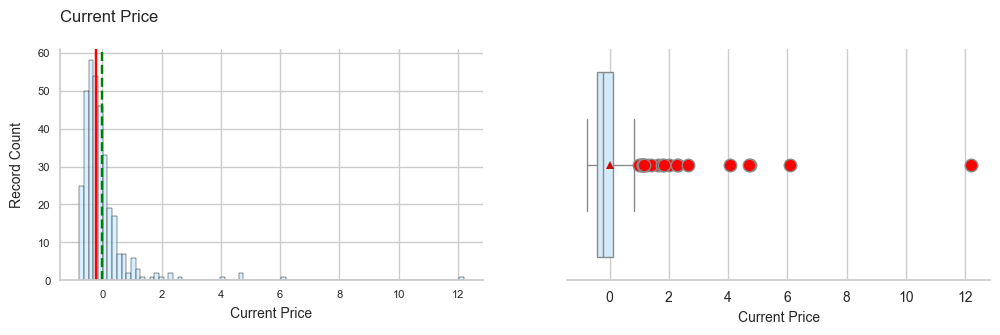

__________________________________________________________________________________________________________________________


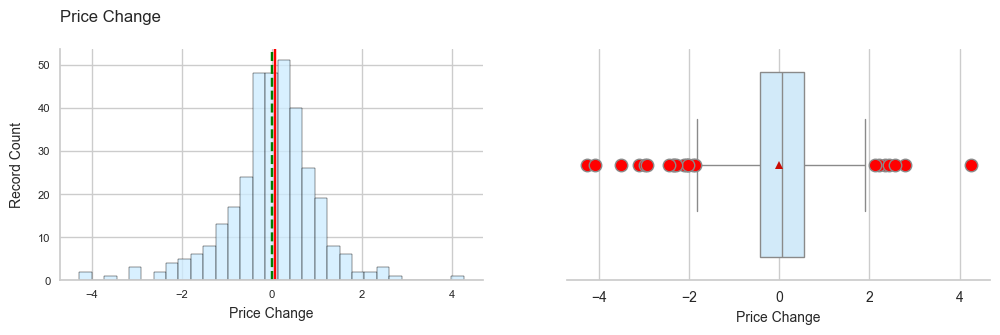

__________________________________________________________________________________________________________________________


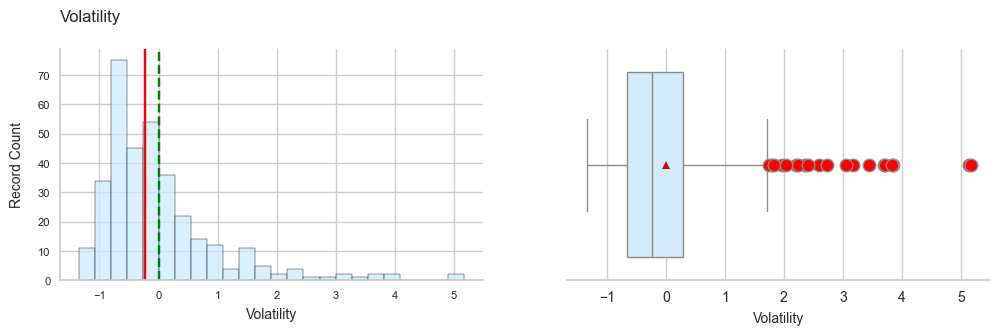

__________________________________________________________________________________________________________________________


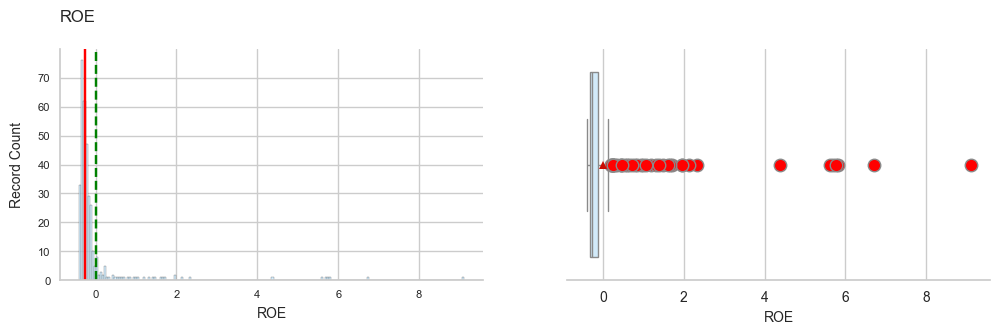

__________________________________________________________________________________________________________________________


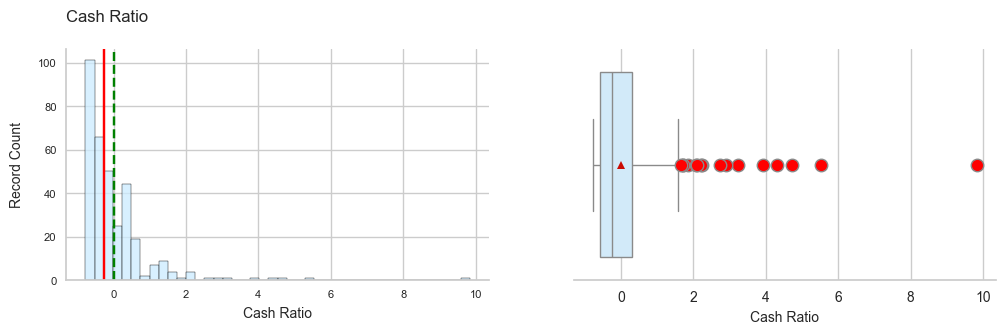

__________________________________________________________________________________________________________________________


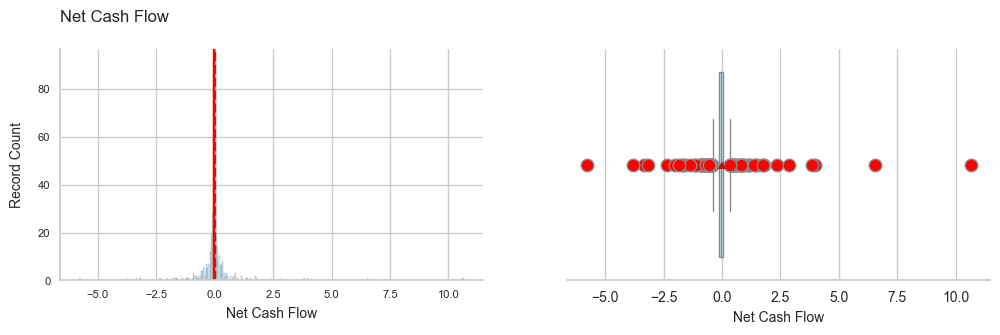

__________________________________________________________________________________________________________________________


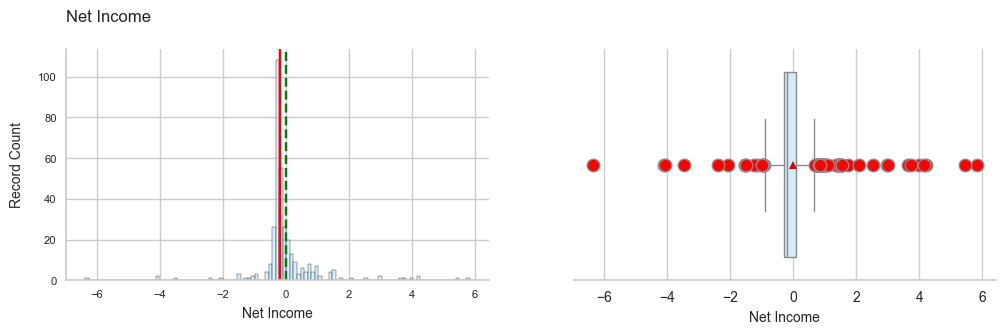

__________________________________________________________________________________________________________________________


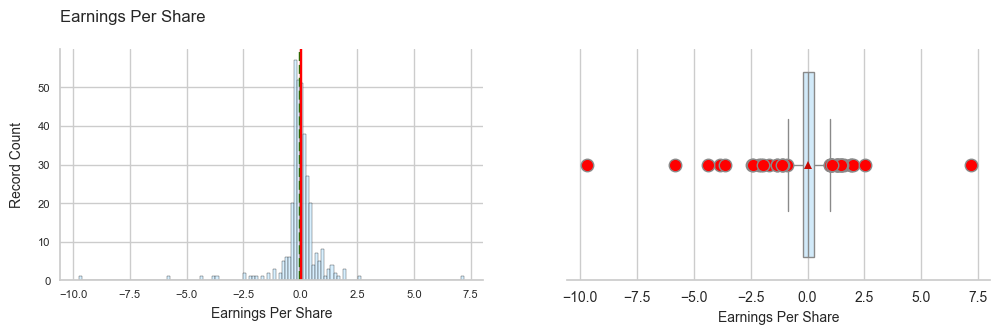

__________________________________________________________________________________________________________________________


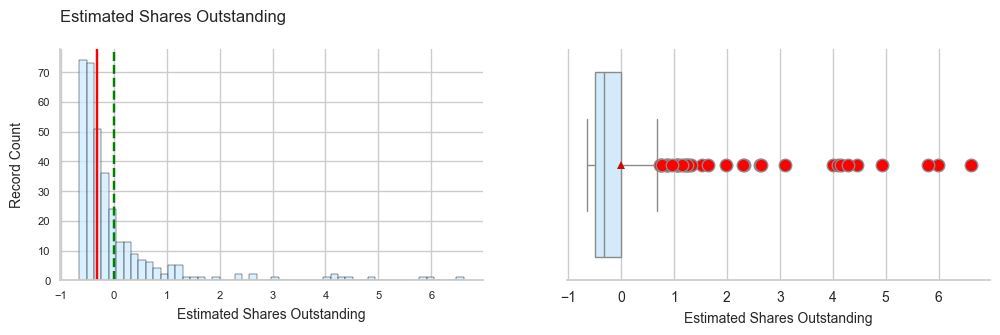

__________________________________________________________________________________________________________________________


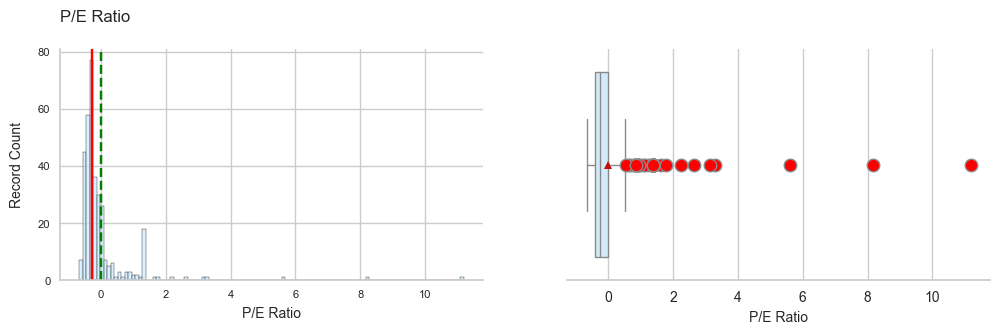

__________________________________________________________________________________________________________________________


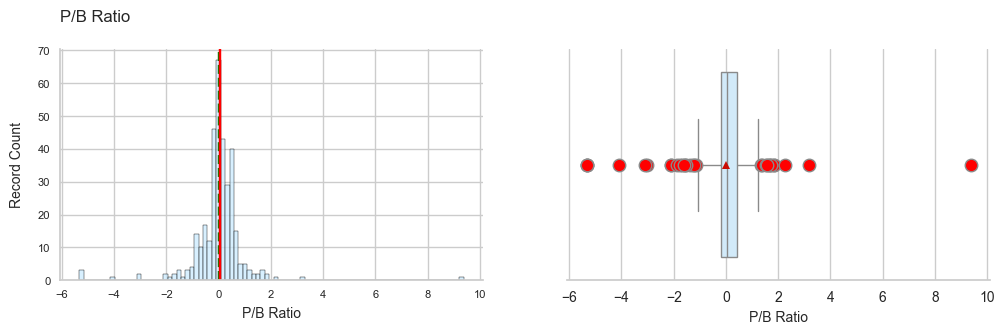

__________________________________________________________________________________________________________________________


In [56]:
# Create histograms and box plots for numerical attributes with many values 

for col in df_num_list:
    hist_box_plots(subset_scaled_df, col)   

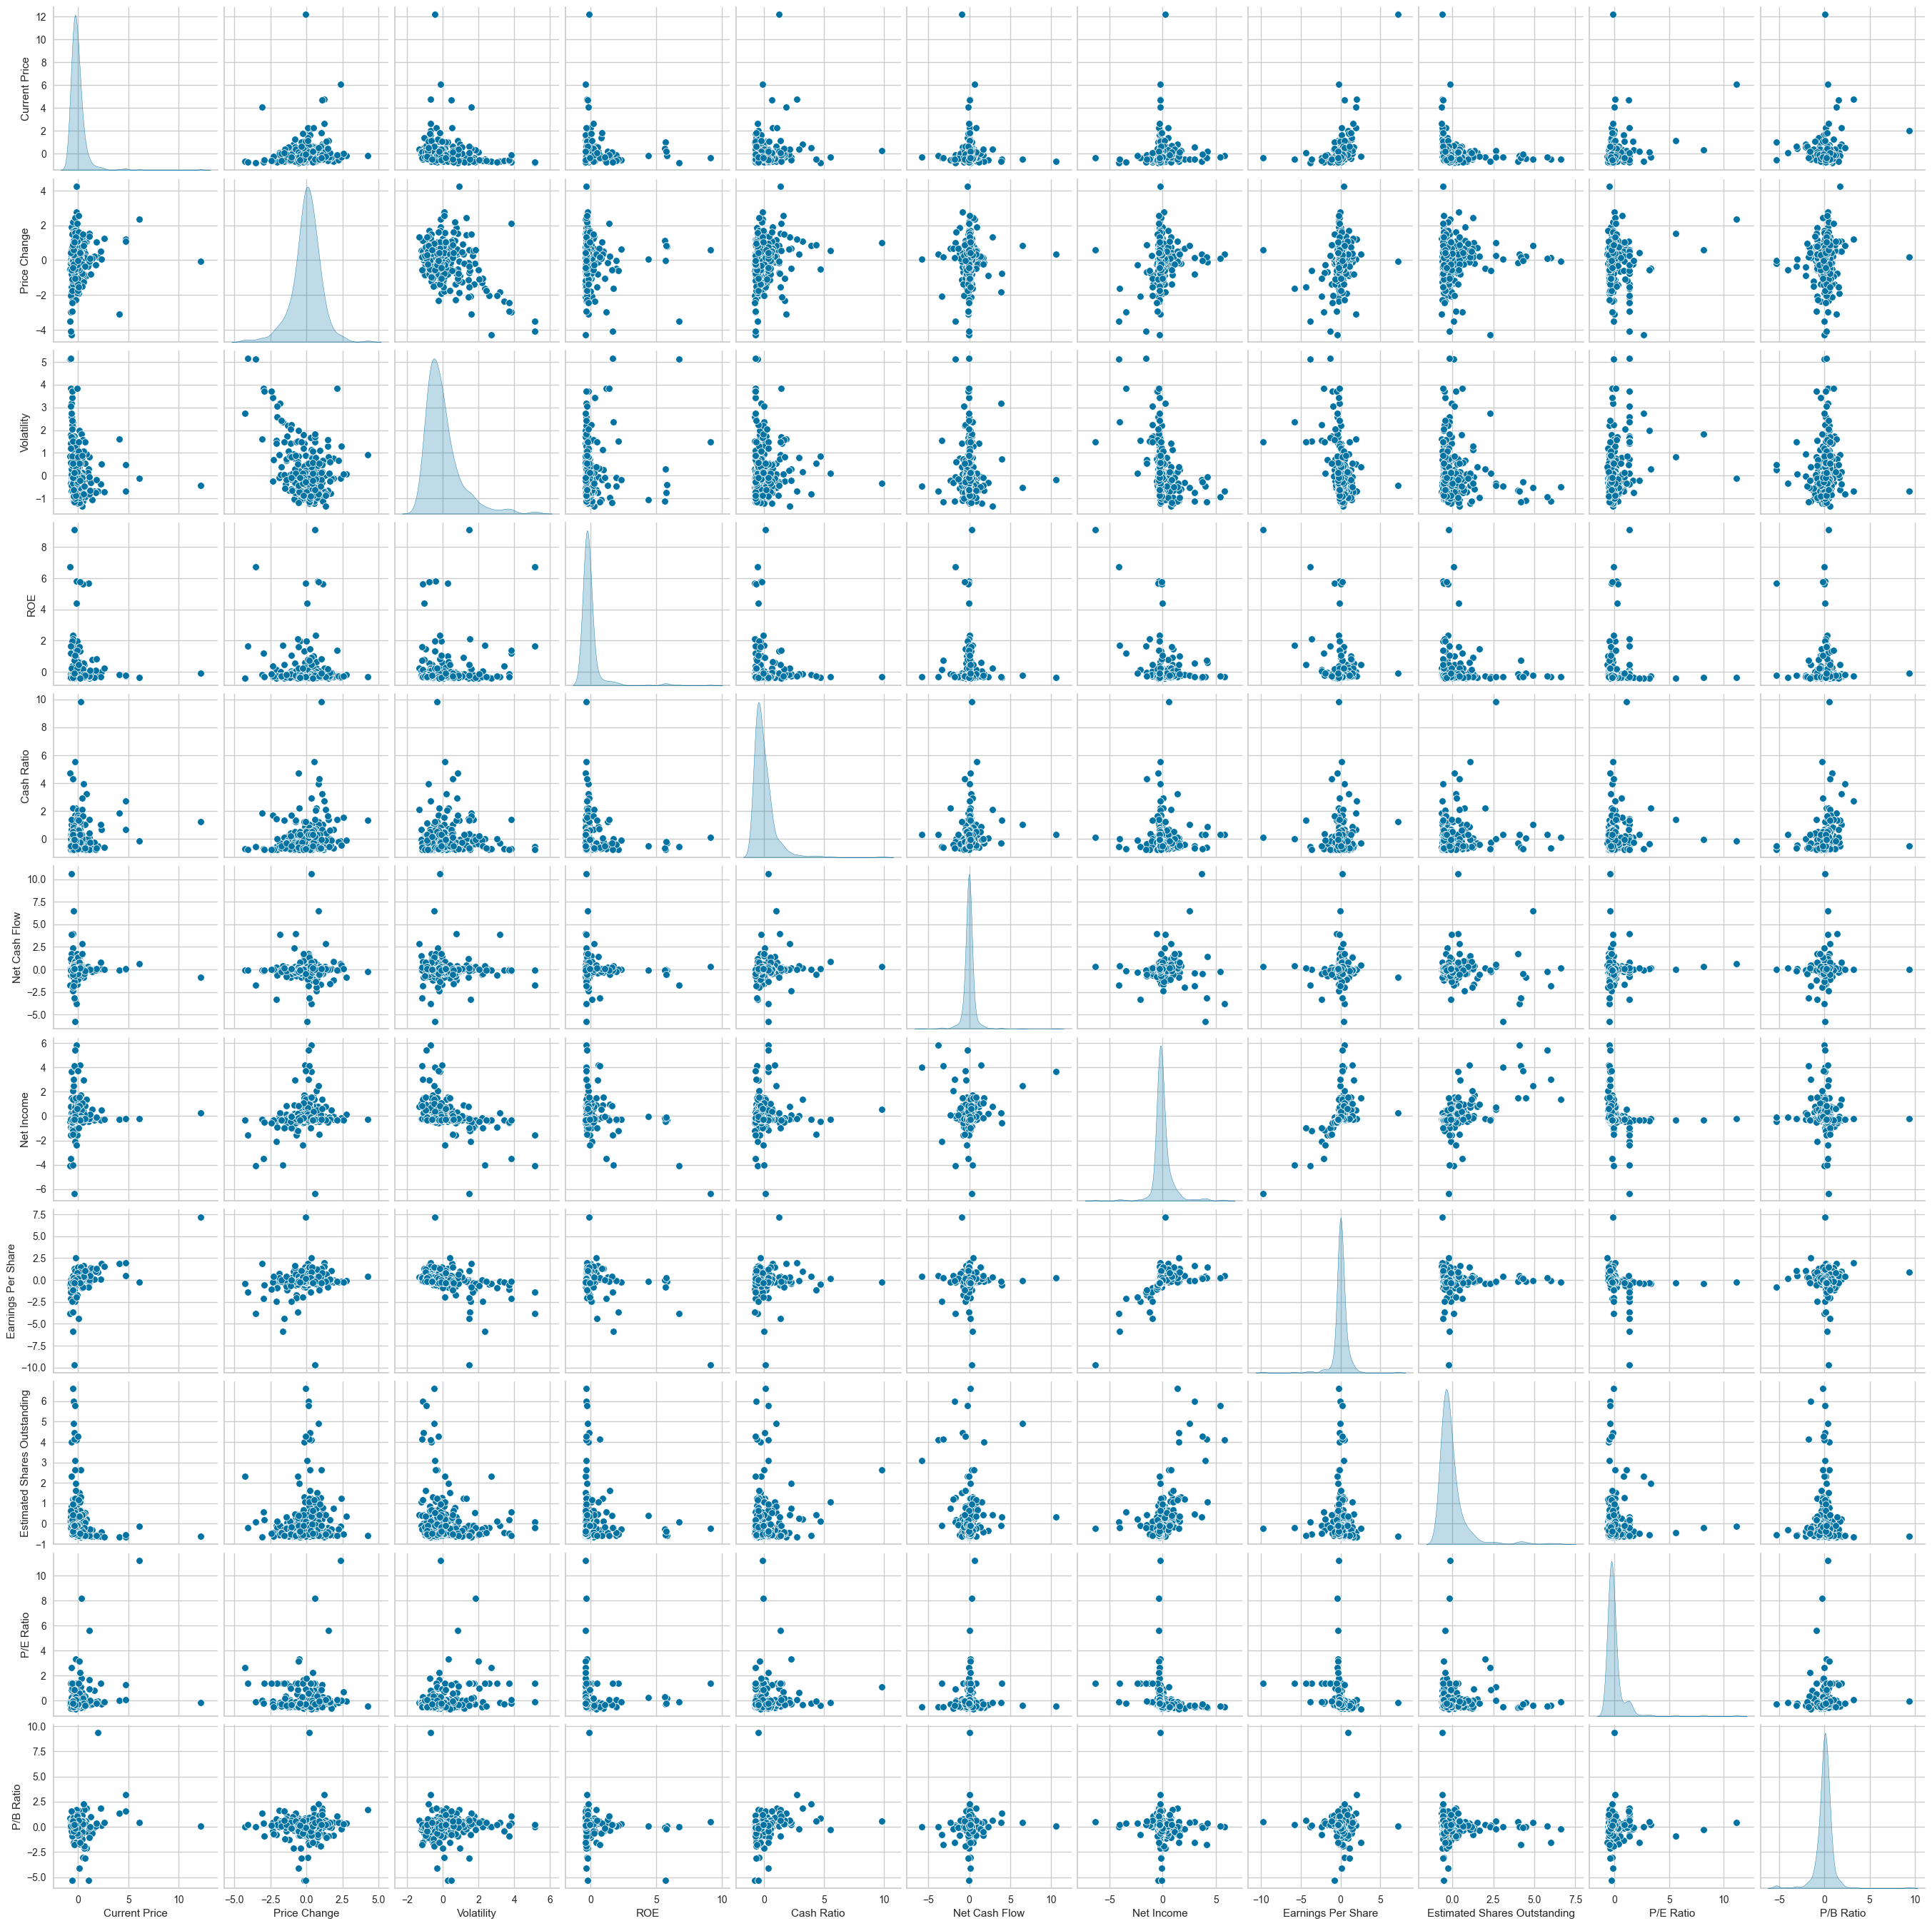

In [57]:
# Crete a pairplot of the numerical attributes
sns.pairplot(data=subset_scaled_df, diag_kind="kde")
plt.show()

#### Observations:
 * ROE, P/E Ratio, and P/B Ratio appear to be bimodal
 * Volatility, Net Income, Estimated Shares Outstanding appear to be trimodal



## K-means Clustering

In [60]:
# Create a copy of the scaled dataset for kMeans processing
k_means_df = subset_scaled_df.copy()

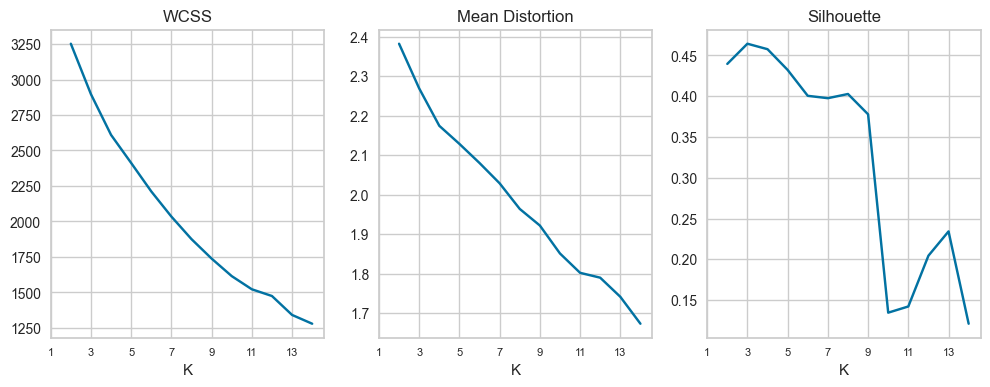

The maximumm silhouette score is 0.46444 with 3 clusters


In [61]:
# Perform the KMeans processing for a range of clusters

# Calculate the WCSS, Mean Distortion, and Sihoulette scores associated with each KMeans cluster grouping
wcss = []
meanDistortions = []
sil_score = []

# Set the range of clusters to create
sizes = range (2,15)

# Create the KMeans object and calcuate the evaluation scores
for k in sizes:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(k_means_df)
    
    # WCSS calculation
    wcss.append(model.inertia_)
    
    # Mean Distortion calculation
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0])
    meanDistortions.append(distortion)
    
    # Silhouette calculation
    sil_score.append(silhouette_score(k_means_df, model.labels_))

# Create a dataframe of the scores and clusters(k) used    
rpt_data = pd.DataFrame ({
                          "WCSS": wcss,
                          "Mean Distortion": meanDistortions,
                          "Silhouette": sil_score,
                          "k": sizes
                         })

# Create a plot containing subplots for each of the calculation methods 
fig, ax = plt.subplots(figsize=(12,4))

for i in range(0,len(rpt_data.columns)-1):

    # Create subplot
    plt.subplot(1,3,i+1) 
    plt.plot(rpt_data.iloc[:,3], rpt_data.iloc[:,i])
    plt.xticks(np.arange(1,14,2),fontsize=8)
    plt.xlabel("K")
    plt.title(rpt_data.columns[i])
plt.show()      

# Print the number of recommended clusters
# The index value is increased by 2 because 1) index starts at 0 and 2) the K clusters starts at 2 and not 1
print('The maximumm silhouette score is {} with {} clusters'.format(round(max(sil_score),5),
                                                                    sil_score.index(max(sil_score))+2
                                                                   )
     )

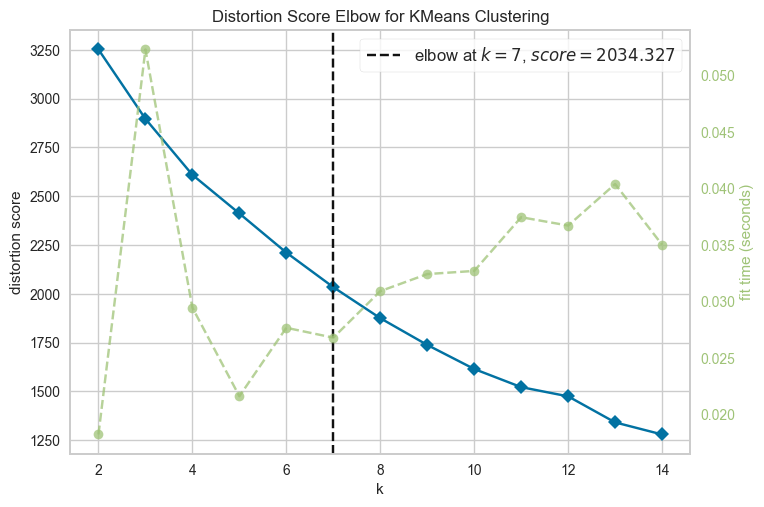

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
# Create  KMeans elbow visualizer using the yellowbrick package
# Calculate the distortion score and fit time
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

#### Observations:
 * The distortion score elbow visulizer for KMeans clustering recommends using 7 clusters

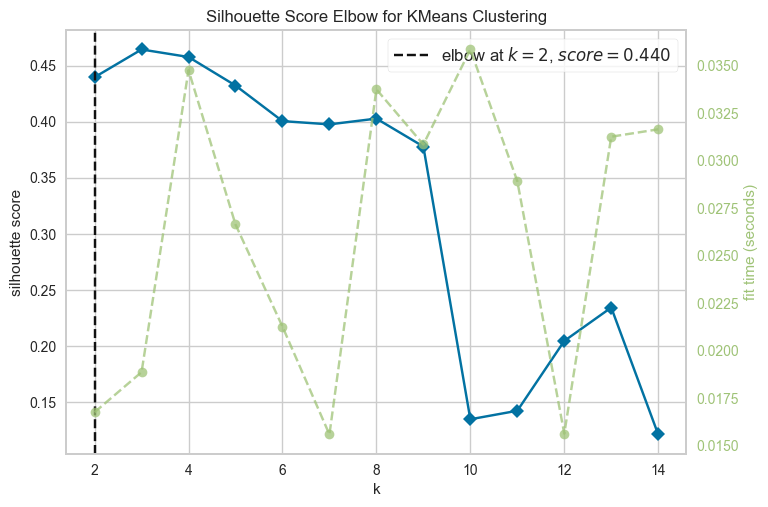

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [64]:
# Create  KMeans elbow visualizer using the yellowbrick package
# Calculate the silhouette score and fit time
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

#### Observations:
 * The silhouette score elbow visualizer for KMeans clustering recommends using 2 clusters

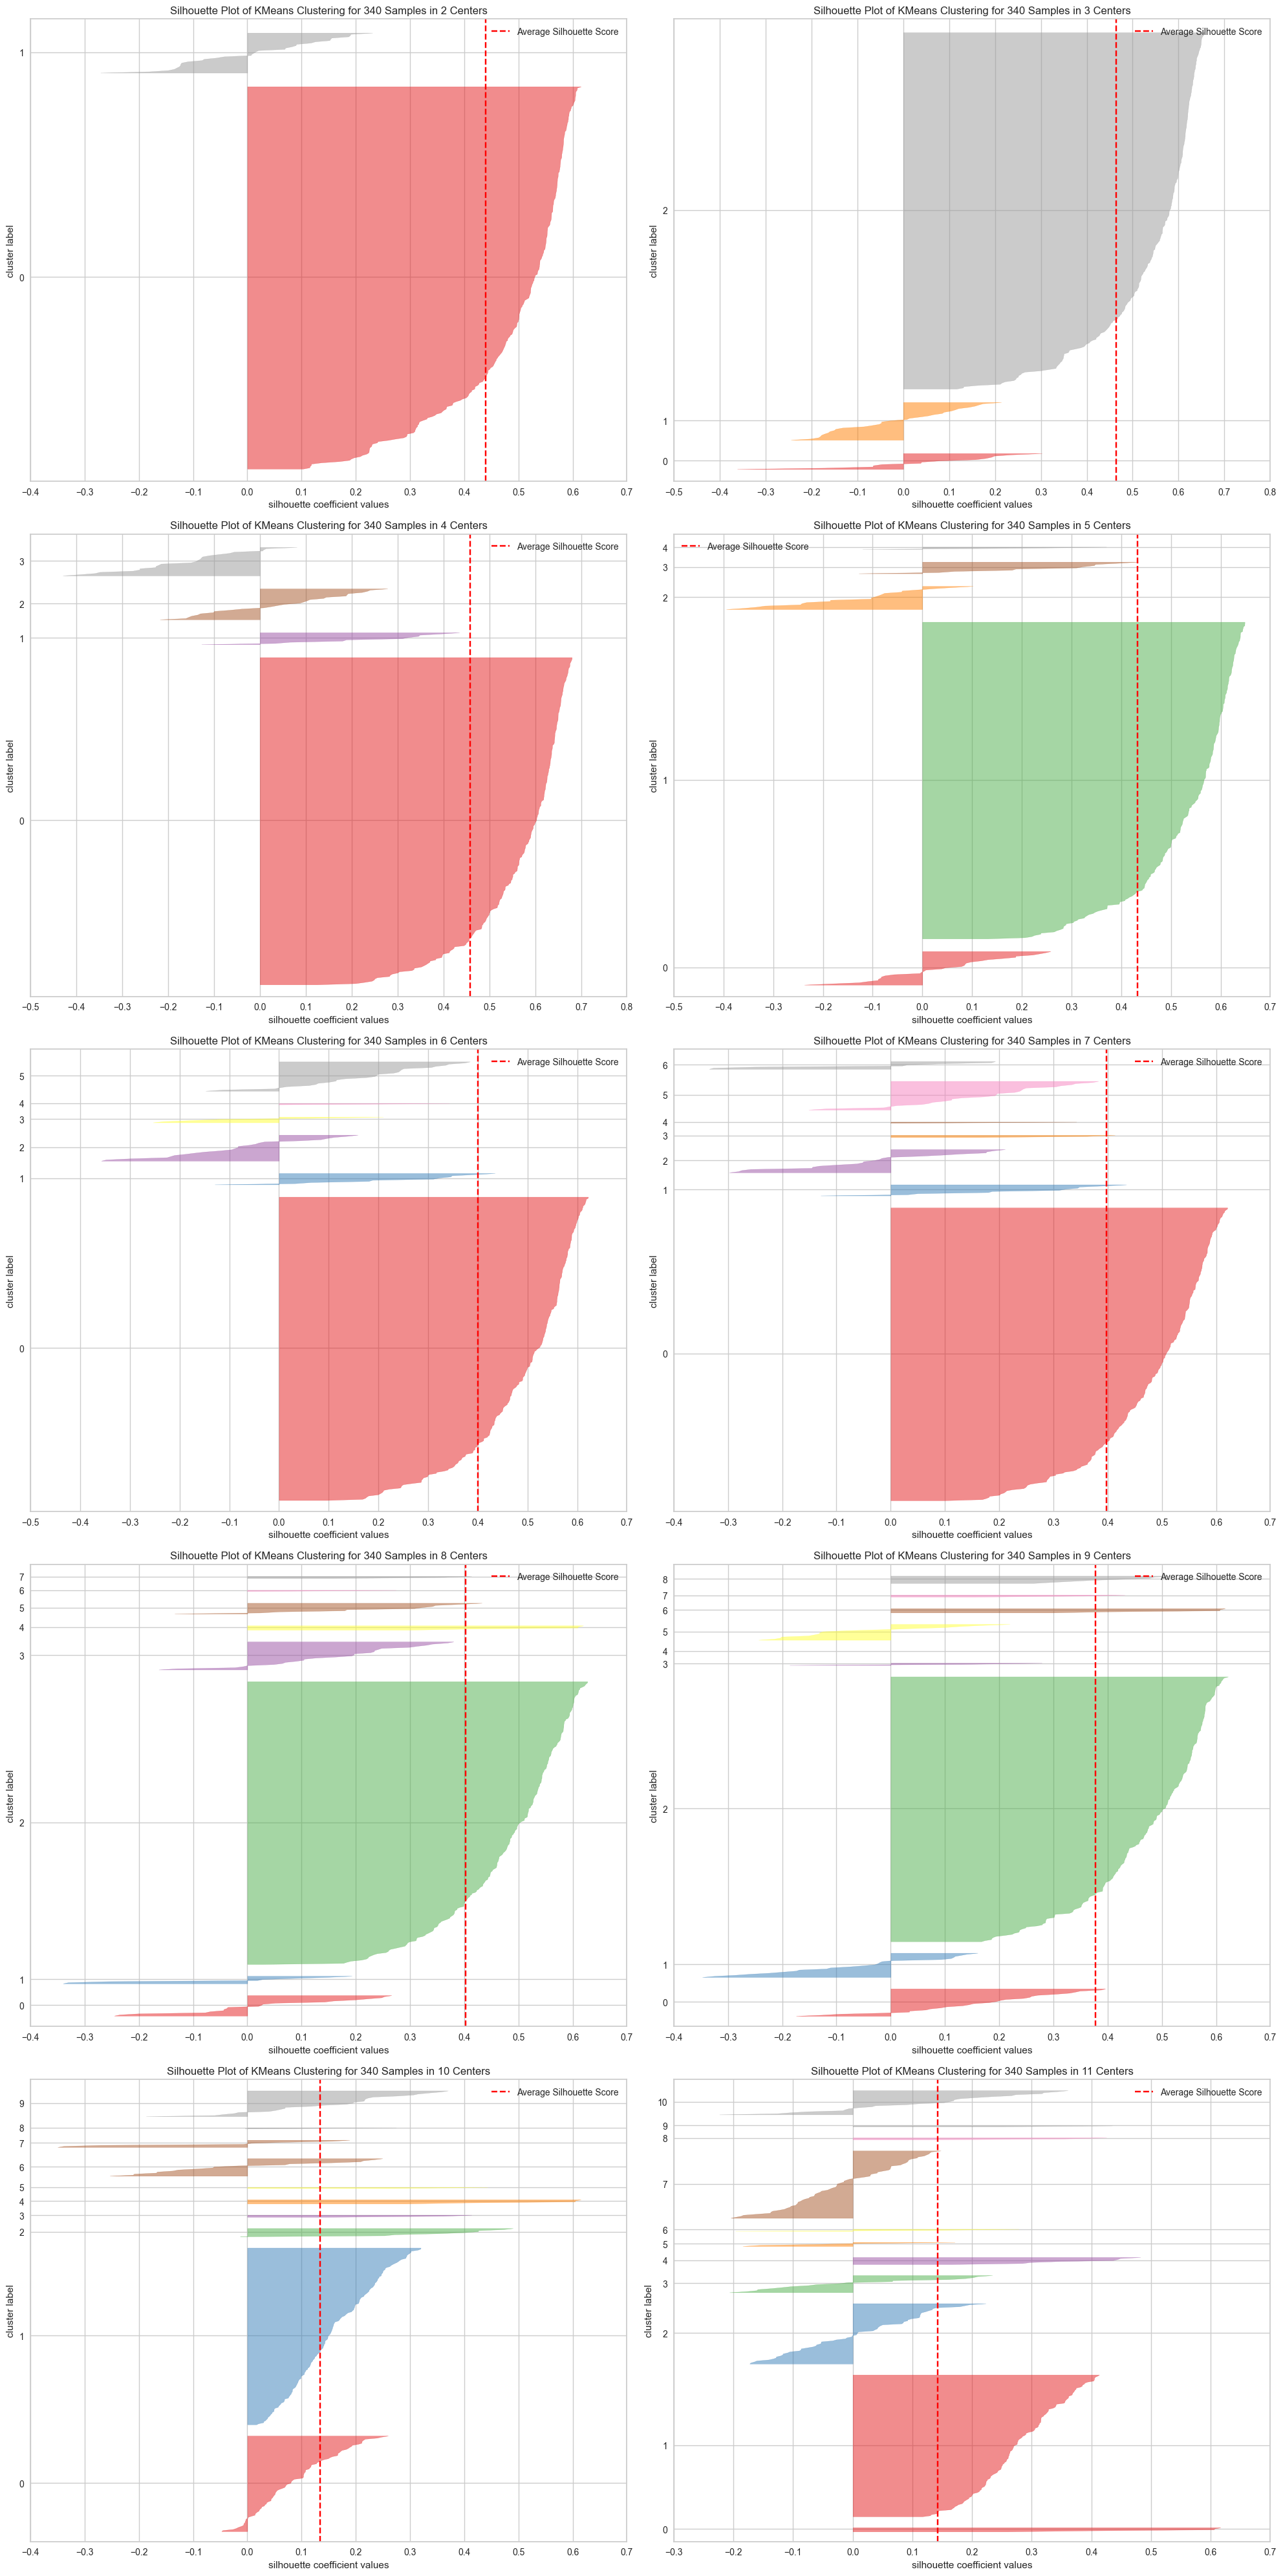

In [65]:
# Graph the silhouette scores for each clusters within each K-means cluster group
flg, axes = plt.subplots(5,2, figsize=(20,40))
axes = axes.reshape(10)
for i,j in enumerate(range(2,12)):
    ax = axes[i]
    visualizer = SilhouetteVisualizer(KMeans(j, random_state=1), ax=ax,)
    visualizer.fit(k_means_df)
    visualizer.finalize()
plt.tight_layout()
plt.show()

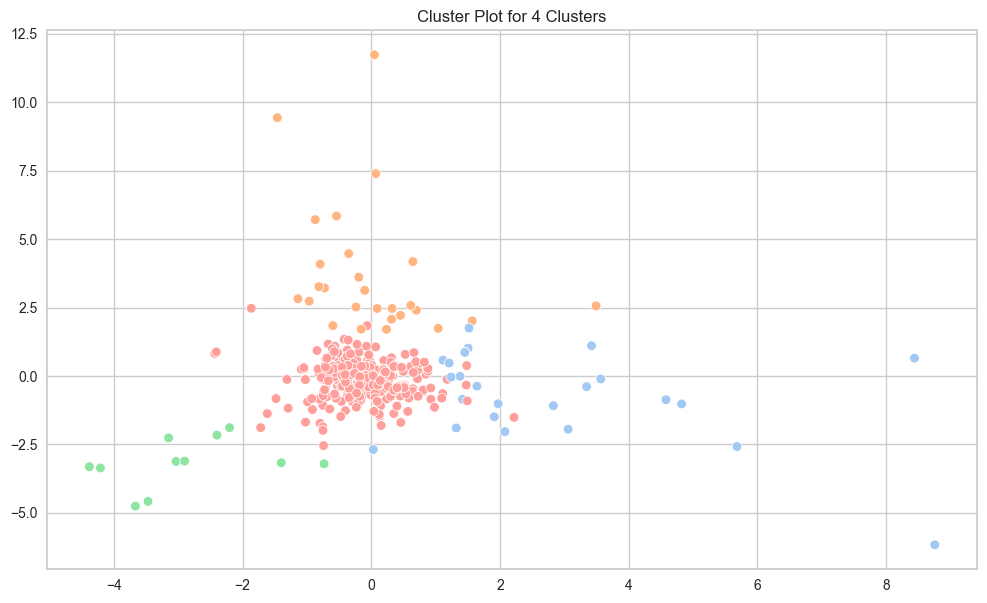

In [66]:
# Create two PCA variables from the scaled k_means_df dataset
# Using the PCA variables, perform KMeans clustering
# Plot the clustering against the PCA variables to determine the quality of the clustering

from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(k_means_df)
plt.figure(figsize=(12,7))
sns.scatterplot(x=plot_columns[:,1], y=plot_columns[:,0], 
                hue=KMeans(n_clusters=4, random_state=0).fit(k_means_df).labels_, palette='pastel',legend=False)
plt.title('Cluster Plot for 4 Clusters')
plt.show()

#### Observations:
 * Clustering using 2 to 7 groups was initially determined based on the recommendations from the distortion and silhouette elbow visualizers
 * Various PCA plots were evaluated based on the recommendations for distinct groupings and outliers recognized in the EDA process. 4 clusters appeared to be the most distinct
 * Accordingly, 4 clusters will be used in the final model

### Create the Final Model

In [71]:
# Final K-means model using 4 clusters
# Time the model execution
kmeans = KMeans(n_clusters=4, random_state=1, init='k-means++')
%timeit kmeans.fit(k_means_df)

20.3 ms ± 2.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [72]:
# Create a copy of the original data
df_copy = df.copy()

# Add kmeans cluster labels to the original and scaled dataframes
df_copy["KM_segments"] = kmeans.labels_



In [73]:
# Show the first 5 rows
df_copy.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  KM_segments  
0                  6.681299e+08    3.718174  -8.784219            0  
1                  1.633016e+09   18.806350  -8.750068            0  
2                  1.504422e+09   15.275510  -0.394171            0  
3                  4.996437e+08   74.555557   4.199651            0  
4                  2.247994e+09  178.451613   1.059810            3

### Cluster Profiling

In [74]:
# Calculate the mean of the numerical columns by the KM_segment values
km_cluster_profile= df_copy.groupby(['KM_segments']).mean()

In [75]:
# Calculate the record counts of the cluster segment values
km_cluster_profile['Segment_Counts'] = df_copy.groupby(['KM_segments'])['Security'].count().values

In [76]:
# Show the dataset highlighting the maximum values in each column
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [77]:
# Show the dataset highlighting the minimum values in each column
km_cluster_profile.style.highlight_min(color="lightgreen", axis=0)

In [78]:
# Print the companies in each cluster segment
for cl in df_copy['KM_segments'].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df_copy[df_copy['KM_segments'] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl

In [79]:
# Show the record counts by segment and GICS sector
df_copy.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          6
             Financials                     45
             Health Care                    29
             Industrials                    52
             Information Technology         24
             Materials                      19
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     2
             Information Technology          1
             Telecommunications Services     2
2            Energy                         22
             Industrials                     1
             Inform

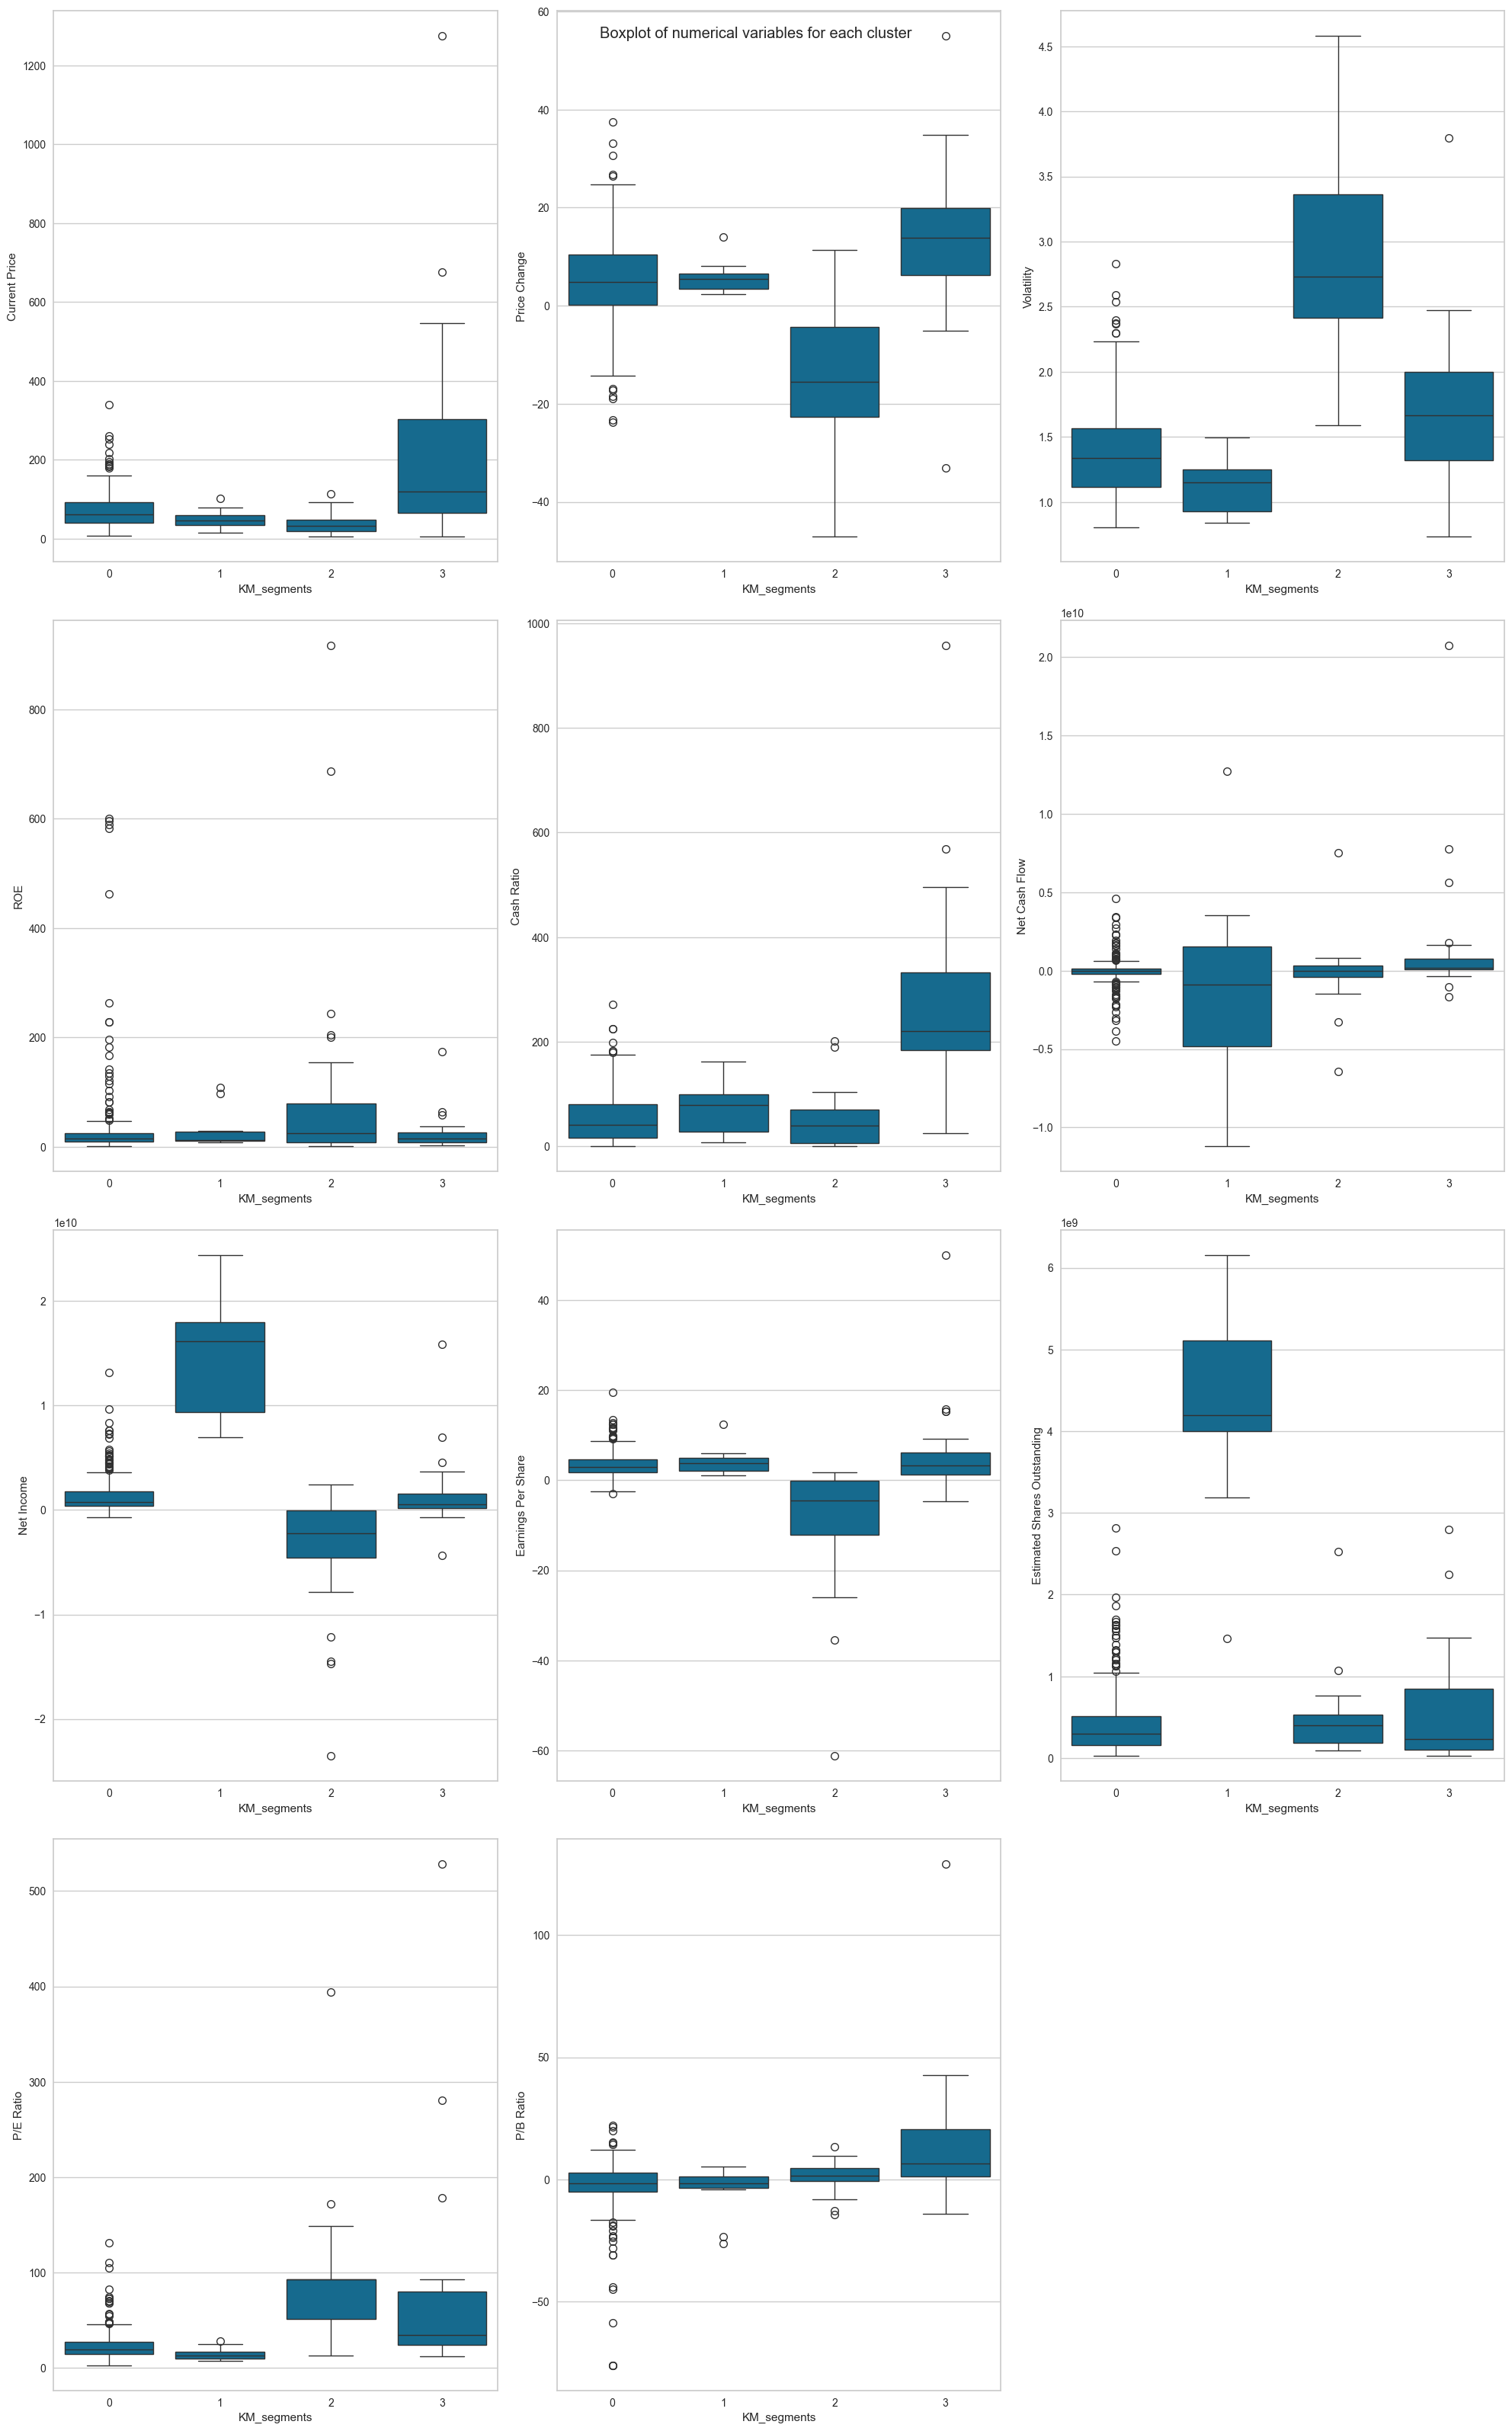

In [80]:
# Create a plot figure for the boxplots
plt.figure(figsize=(20, 40))
plt.suptitle("Boxplot of numerical variables for each cluster")

# Select the numerical columns of the original dataset
num_col = df.select_dtypes(include=np.number).columns.tolist()

# For each column, create boxplots separated by the cluster group
for i, variable in enumerate(num_col):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=df_copy, x="KM_segments", y=variable)

plt.tight_layout()
plt.show()

In [81]:
# Describe the attributes by the KM_segment values
pd.set_option('display.max_rows', None)
df_copy.groupby(["KM_segments" ]).describe().T.apply(lambda x: x.apply('{0:,.0f}'.format))

KM_segments                                      0                1  \
Current Price                count             277               11   
                             mean               72               51   
                             std                47               24   
                             min                 7               14   
                             25%                41               34   
                             50%                61               46   
                             75%                92               60   
                             max               339              101   
Price Change                 count             277               11   
                             mean                5                6   
                             std                 9                3   
                             min               -24                2   
                             25%                 0                3   
                             50%                 5                6   
                             75%                10                7   
                             max                37               14   
Volatility                   count             277               11   
                             mean                1                1   
                             std                 0                0   
                             min                 1                1   
                             25%                 1                1   
                             50%                 1                1   
                             75%                 2                1   
                             max                 3                1   
ROE                          count             277               11   
                             mean               35               31   
                             std                81               37   
                             min                 1                8   
                             25%                10               10   
                             50%                15               12   
                             75%                25               28   
                             max               601              109   
Cash Ratio                   count             277               11   
                             mean               53               76   
                             std                46               53   
                             min                 0                7   
                             25%                17               28   
                             50%                41               79   
                             75%                81               99   
                             max               271              162   
Net Cash Flow                count             277               11   
                             mean      -14,046,224   -1,072,272,727   
                             std       882,995,014    6,349,838,834   
                             min    -4,496,000,000  -11,208,000,000   
                             25%      -189,000,000   -4,805,000,000   
                             50%          -395,000     -911,000,000   
                             75%       142,787,000    1,561,000,000   
                             max     4,624,000,000   12,747,000,000   
Net Income                   count             277               11   
                             mean    1,482,212,390   14,833,090,909   
                             std     1,820,174,773    6,101,908,545   
                             min      -692,000,000    6,960,000,000   
                             25%       419,222,000    9,396,500,000   
                             50%       783,000,000   16,150,000,000   
                             75%     1,757,000,000   17,993,500,000   
                        

#### Observations:
 * The number of clusters has been determined to be 4
 * A scatterplot of the data using 2 PCA values show the 4 clusters are distinctly separated 
 * The segment value (0 to 3) may change during processing, but the clusters themselves do not

Cluster 1:
 * Records only had the most records. These appear to be non-outlier type records from a maximum average value standpoint
 * Records had the least number of outstanding shares
    
Cluster 2:
 * Records included the highest net incomes, and estimated shares outstanding
 * Records included the lowest volatility, net cash flow, P/E ratio, and P/B ratio, and record count

Cluster 3:
 * Records included the highest volatility, ROE, and P/E ratio
 * Records included the lowest current price, price change, cash ratio, net income, and earnings per share
 * Most companies in this cluster were from the energy sector
 
Cluster 4: 
 * Records included the highest current price, price change, cash ratio, net cash flow, earnings per share, and P/B ratio 
 * Records had the lowest ROE   

## Hierarchical Clustering

In [82]:
# Create a copy of the scaled dataset for hierarchical cluster processing
hc_df = subset_scaled_df.copy()

### Computing Cophenetic Correlation

In [86]:
# Create list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# Create list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

# Set the baseline values
high_cophenet_corr = 0
high_dm_lm = [0, 0]

# Cycle through the distance metrics and linkage methods creating the cophenetic correlations
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained using the {} distance and {} linkage.".format(
        round(high_cophenet_corr,4), high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)            

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850003.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159737.
Cophenetic correl

#### Observations:
 * The highest cophenetic correlation score is Euclidean distance and average linkage with 0.9422540609560814

### Checking Dendograms

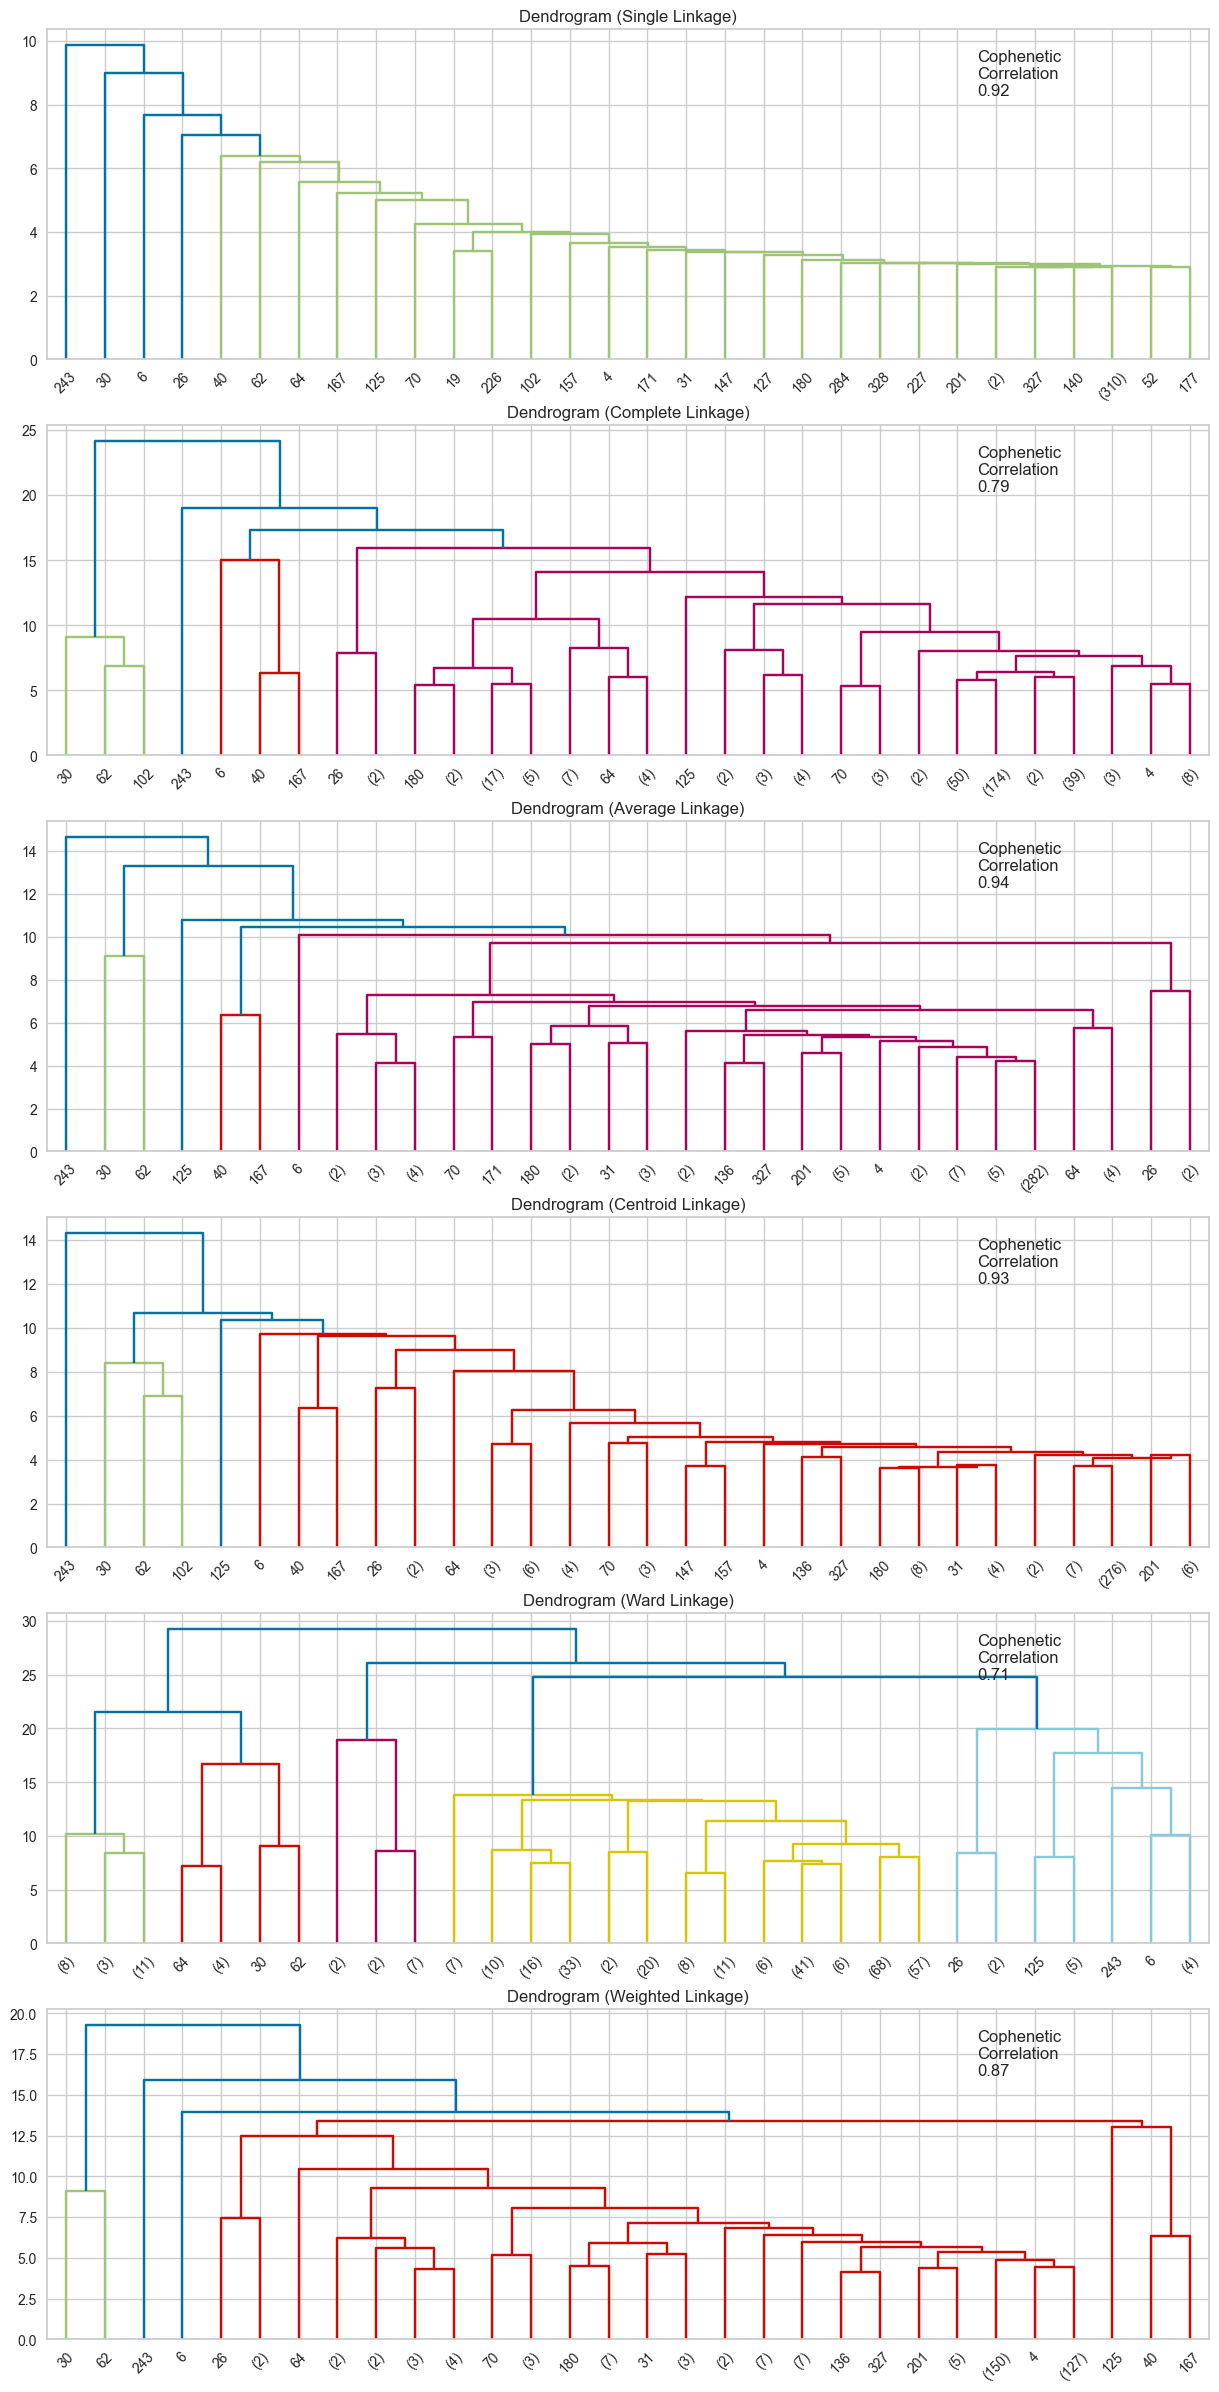

In [87]:
# Create list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Correlation"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))


# Cycle through the Euclidean linkage methods creating the cophenetic correlations and dendrograms
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i], truncate_mode='lastp', p=30)
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
    
    compare.append([method, coph_corr])

In [89]:
# Create and show a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Correlation")
df_cc

Linkage  Cophenetic Correlation
4      ward                0.710118
1  complete                0.787328
5  weighted                0.869378
0    single                0.923227
3  centroid                0.931401
2   average                0.942254

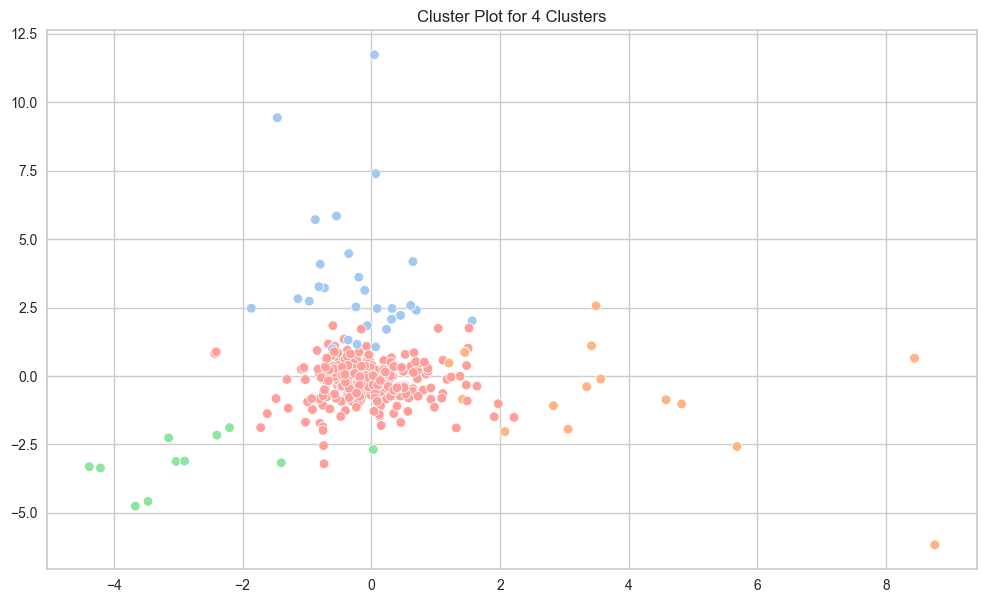

In [90]:
# Create two PCA variables from the scaled hc_df dataset
# Using the PCA variables, perform agglomerative clustering
# Plot the clustering against the PCA variables to determine the quality of the clustering

from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(hc_df)
plt.figure(figsize=(12,7))
sns.scatterplot(x=plot_columns[:,1], y=plot_columns[:,0], 
                hue=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
                    .fit(hc_df).labels_, palette='pastel',legend=False)
plt.title('Cluster Plot for 4 Clusters')
plt.show()

#### Observations:
 * The results of the cophentic correlation process indicates using the Euclidean distance metric with an average linkage as the correlation score was 0.9422. However, the dendrogram for the average linkage using Euclidean distance did not cluster well after the initial large clustering. Single records failed to merge together to form small clusters and were left similar to outliers
 * The ward linkage appeared to have better clustering groups containing multiple records in each cluster. The perceived elbow was 4 clusters.
 * A PCA plot was evaluated based on the Euclidean and ward parameters with 4 clusters. The clusters appeared to be the most distinct
 * Accordingly, 4 clusters will be used in the final model with Euclidean and ward parameters

### Creating model using sklearn

In [91]:
# Create a agglomerative cluster
# Time the model execution
HCmodel = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
%timeit HCmodel.fit(hc_df)

3.55 ms ± 689 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [92]:
# Add the hierarchical cluster labels to the original dataframe
df_copy["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [93]:
# Calculate the mean of the numerical columns by the HC_segment values
hc_cluster_profile= df_copy.groupby(['HC_segments']).mean()

In [94]:
# Calculate the record counts of the cluster segment values
hc_cluster_profile['Segment_Counts'] = df_copy.groupby(['HC_segments'])['Security'].count().values

In [95]:
# Show the dataset highlighting the maximum values in each column
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [96]:
# Show the dataset highlighting the minimum values in each column
hc_cluster_profile.style.highlight_min(color="lightgreen", axis=0)

In [97]:
# Print the companies in each cluster segment
for cl in df_copy['HC_segments'].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df_copy[df_copy['HC_segments'] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Lim

In [98]:
# Show the record counts by segment and GICS sector
df_copy.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                2
             Energy                         22
             Financials                      1
             Industrials                     1
             Information Technology          1
             Materials                       1
1            Consumer Discretionary          3
             Consumer Staples                1
             Health Care                     5
             Information Technology          4
             Real Estate                     1
             Telecommunications Services     1
2            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     1
             Information Technology          1
             Telecommunications Services     2
3            Consum

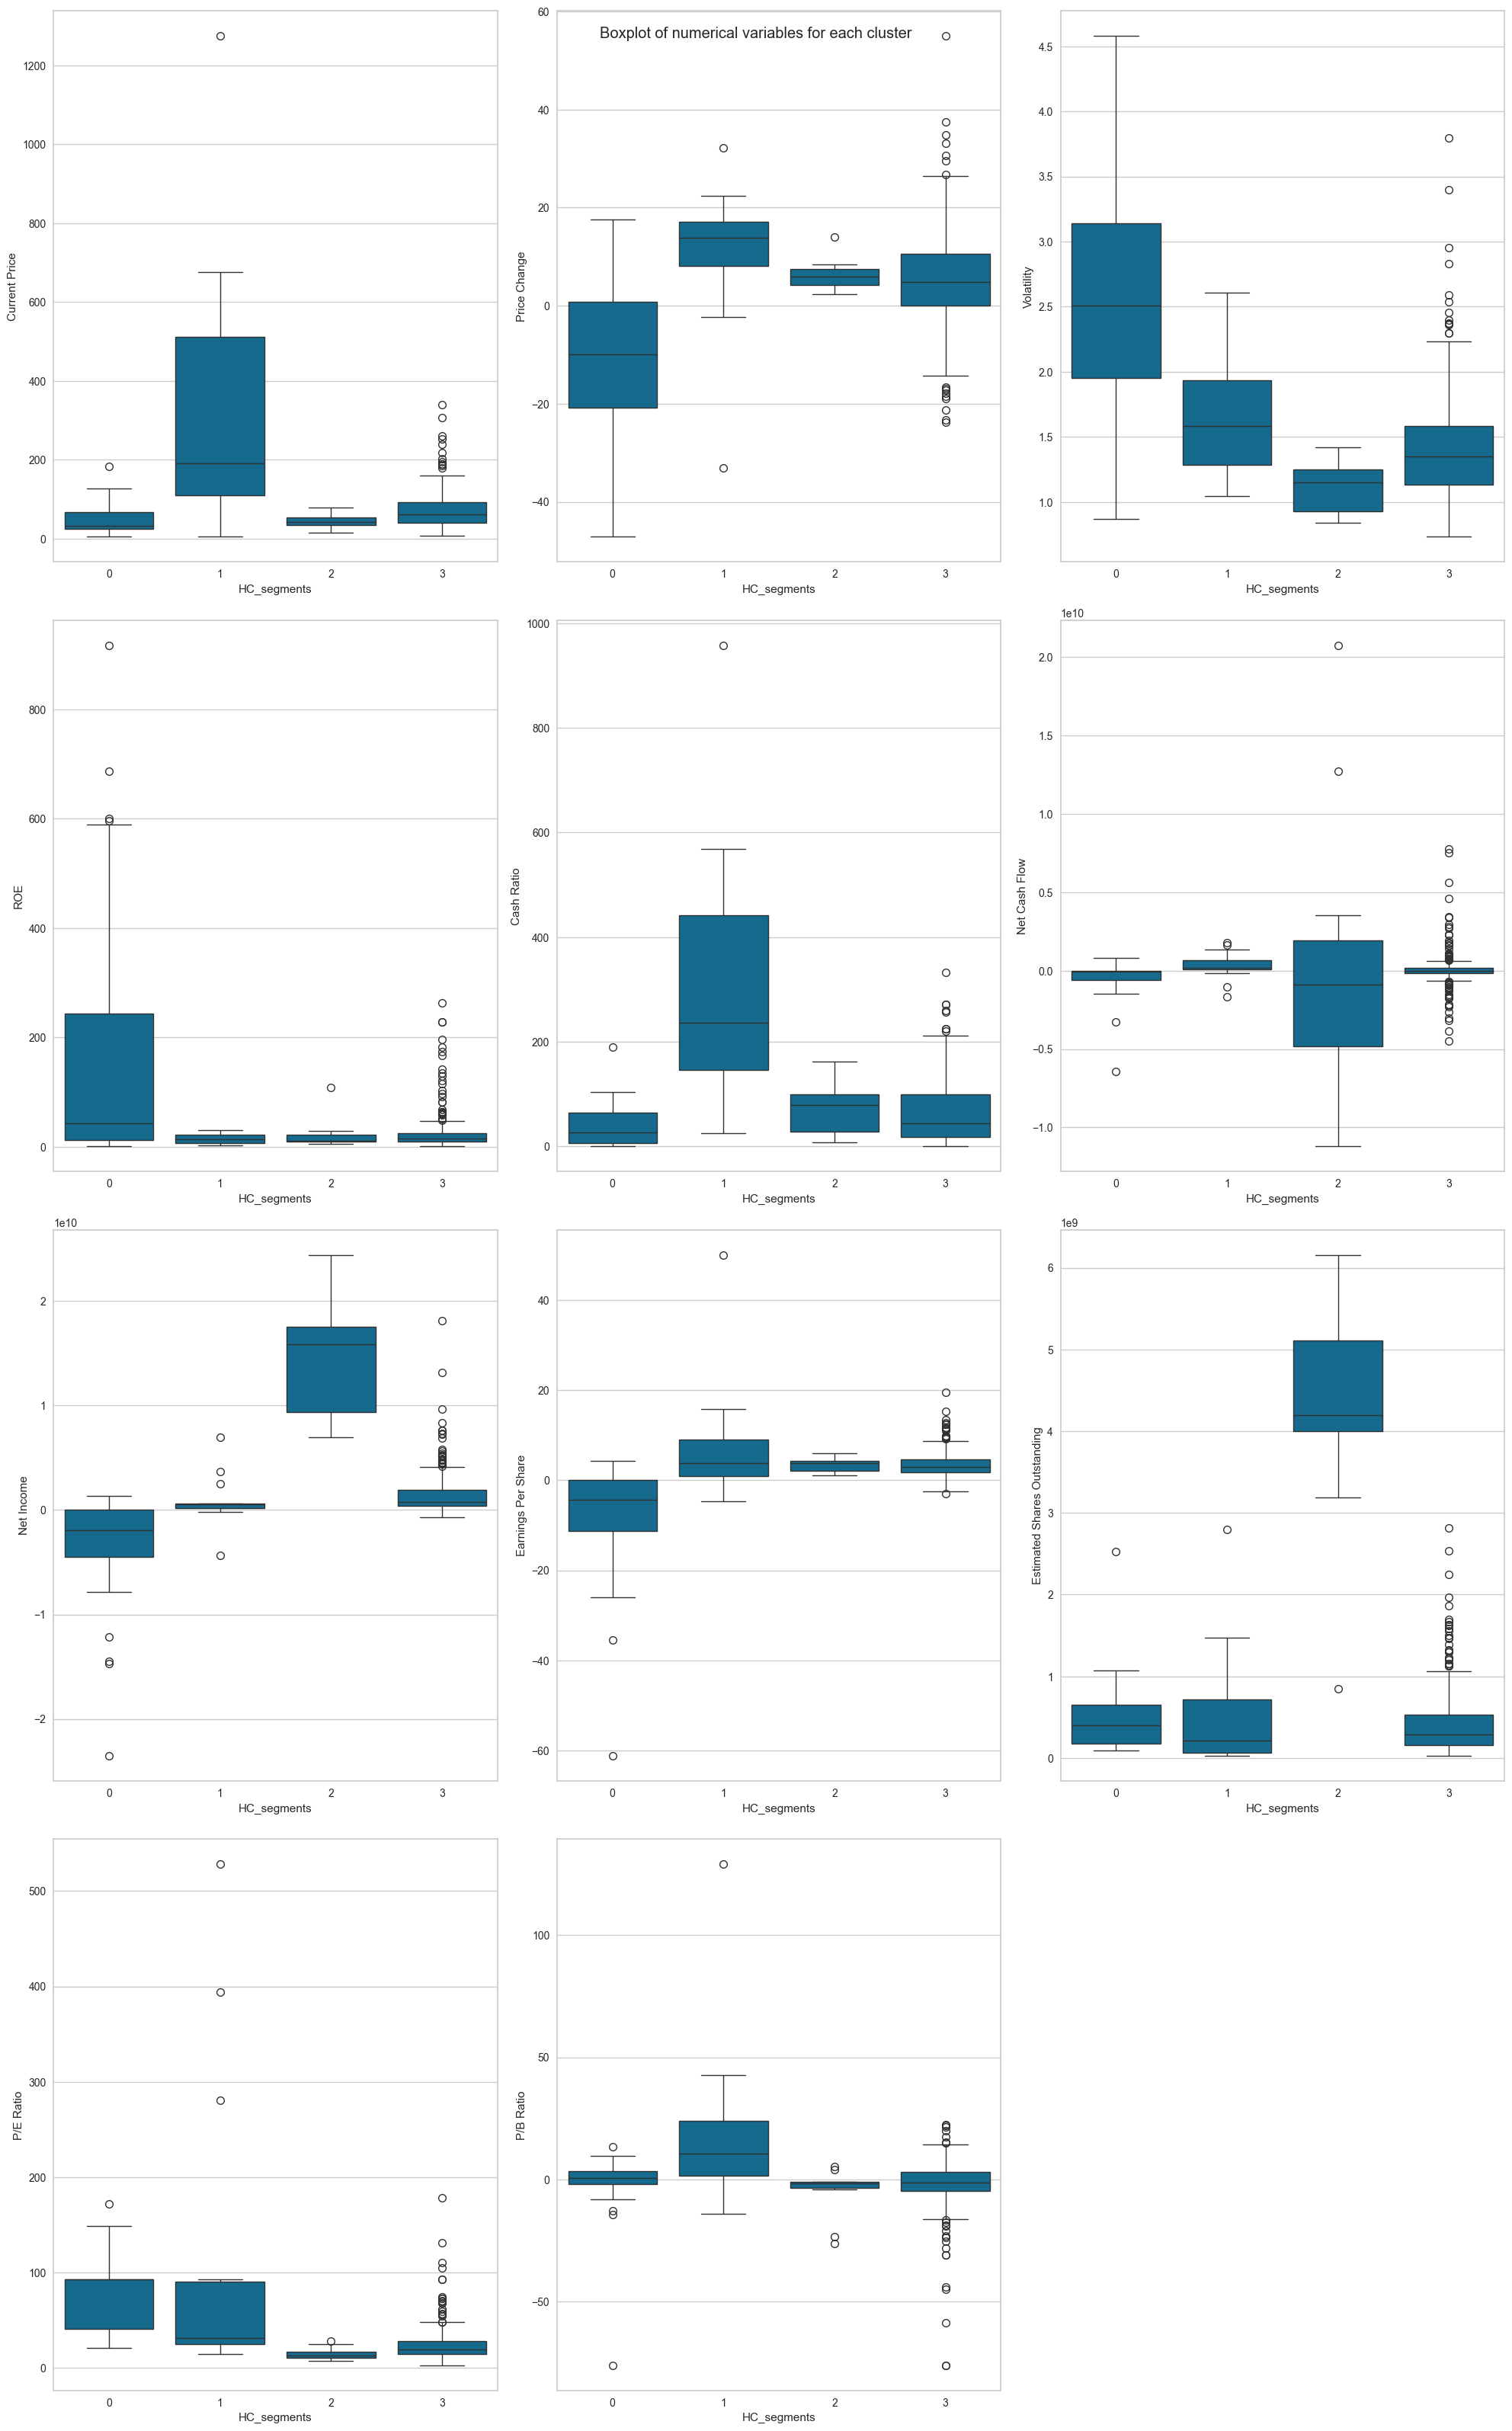

In [100]:
# Create a plot figure for the boxplots
plt.figure(figsize=(20, 40))
plt.suptitle("Boxplot of numerical variables for each cluster")

# Select the numerical columns of the original dataset
num_col = df.select_dtypes(include=np.number).columns.tolist()

# For each column, create boxplots separated by the cluster group
for i, variable in enumerate(num_col):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=df_copy, x="HC_segments", y=variable)

plt.tight_layout()
plt.show()

In [101]:
# Describe the attributes by the HC_segment values
pd.set_option('display.max_rows', None)
df_copy.groupby(["HC_segments" ]).describe().T.apply(lambda x: x.apply('{0:,.0f}'.format))

HC_segments                                       0               1  \
Current Price                count               29              15   
                             mean                48             326   
                             std                 40             337   
                             min                  4               5   
                             25%                 24             110   
                             50%                 33             191   
                             75%                 67             511   
                             max                183           1,275   
Price Change                 count               29              15   
                             mean               -11              11   
                             std                 17              15   
                             min                -47             -33   
                             25%                -21               8   
                             50%                -10              14   
                             75%                  1              17   
                             max                 18              32   
Volatility                   count               29              15   
                             mean                 3               2   
                             std                  1               0   
                             min                  1               1   
                             25%                  2               1   
                             50%                  3               2   
                             75%                  3               2   
                             max                  5               3   
ROE                          count               29              15   
                             mean               197              14   
                             std                267              10   
                             min                  1               2   
                             25%                 12               6   
                             50%                 43              14   
                             75%                244              22   
                             max                917              30   
Cash Ratio                   count               29              15   
                             mean                40             309   
                             std                 43             247   
                             min                  0              25   
                             25%                  6             146   
                             50%                 27             237   
                             75%                 64             442   
                             max                190             958   
Net Cash Flow                count               29              15   
                             mean      -495,901,724     288,850,667   
                             std      1,395,486,857     902,971,715   
                             min     -6,430,000,000  -1,671,386,000   
                             25%       -588,000,000      65,744,000   
                             50%        -86,000,000     160,383,000   
                             75%          2,000,000     643,861,000   
                             max        830,000,000   1,805,094,000   
Net Income                   count               29              15   
                             mean    -3,597,244,655     864,498,533   
                             std      5,825,610,014   2,363,847,601   
                             min    -23,528,000,000  -4,359,082,000   
                             25%     -4,524,515,000     165,887,000   
                             50%     -1,967,000,000     546,733,000   
                             75%         65,900,000     616,298,500   
                        

#### Observations:
 * The number of clusters has been determined to be 4
 * A scatterplot of the data using 2 PCA values show the 4 clusters is distinctly separated 
 * The segment value (0 to 3) may change during processing, but the clusters themselves do not

Cluster 1:
 * Contained the most records. These appear to be non-outlier type records from a maximum average value standpoint
 * Records had the least number of outstanding shares
    
Cluster 2:
 * Records included the highest net cash flow, net income, and estimated shares outstanding
 * Records included the lowest current price, volatility, P/E ratio, and P/B ratio, and record count

Cluster 3:
 * Records included the highest volatility and ROE
 * Records included the lowest price change, cash ratio, net cash flow, net income, and earnings per share
 * Most companies in this cluster were from the energy sector
 
Cluster 4: 
 * Records included the highest current price, price change, cash ratio,  earnings per share, P/E ratio, and P/B ratio 
 * Records had the lowest ROE   

## K-means vs Hierarchical Clustering

In [102]:
# Show the record counts by both segments and GICS sector
df_copy.groupby(["KM_segments", "HC_segments", ])['Security'].count()

KM_segments  HC_segments
0            0                6
             3              271
1            2               10
             3                1
2            0               23
             1                1
             3                3
3            1               14
             2                1
             3               10
Name: Security, dtype: int64

#### Execution times:
 * Hierarchical clustering took less time to execute than the K-means clustering technique

#### Clustering 
 * Both final clustering techniques produced 4 clusters each
 * Cluster 0 will be considered as KM segment 0
 * Cluster 1 will be considered as KM segment 1
 * Cluster 2 will be considered as KM segment 2
 * Cluster 3 will be considered as KM segment 3

#### Clustering record alignments between techniques
 * KM segment 0 is similar to HC segment 3 with 271 similar observations
 * KM segment 1 is similar to HC segment 2 with 10 similar observations
 * KM segment 2 is similar to HC segment 0 with 14 simliar observations
 * KM segment 3 is similar to HC segment 1 with 23 similar observations
 * There were 22 observations that were in different clusters between the two techniques for 6% difference
 
 #### Maximum average value observances between techniques
  * KM segment 0 and HC segment 3 both had the most record count
  * KM segment 1 and HC segment 2 both had the highest net income and estimated shares outstanding
  * KM segment 2 and HC segment 0 both had the highest volatility and ROE
  * KM segment 3 and HC segment 1 both had the highest current price, price change, cash ratio, earnings per share, and P/B ratio
  * The maximum average net cash flow and P/E ratio are different between the techniques
  
 #### Minimum average value observances between techniques
  * KM segment 0 and HC segment 3 both had the estimated shares outstanding
  * KM segment 1 and HC segment 2 both had the lowest volatility, P/E ratio, and P/B ratio, and record count
  * KM segment 2 and HC segment 0 both had the lowest price change, cash ratio, net income, and earnings per share 
  * KM segment 3 and HC segment 1 both had the lowest ROE
  * The minimum average current price and net cash flow are different between the techniques 

## Actionable Insights and Recommendations

#### Highlighting noticeable differences between the clusters
 * Cluster 0
     - These are average risk stocks with each attribute in the middle ground when compared to the other clusters
     - There were several negative outliers for the P/B ratio
 * Cluster 1
     - Lowest volatile companies with a mean 1 
     - The net cash flow had the lowest values and widest spread
     - Highest net income values with the middle 50% between 9 and 18 billion
     - Highest shares outstanding with the middle 50% between 4 and 5 billion
 * Cluster 2 
     - Contains mostly energy companies (22 out of 27)
     - Highest volatile companies with an average of 3
     - Price change is mostly negative with 75% of stocks between -47 and -4
     - Highest average ROE of 107 with the middle 50% between 8 and 80
     - Lowest net income values with the middle 50% between 0 and -4.5 billion
     - Lowest earnings per share with the middle 50% between 0 and -12
     - High P/E ratios with the middle 50% between 51 and 93
 * Cluster 3 
     - Have the highest stocks prices with the middle 50% between 120 and 302 per share
     - Highest price changes with the middle 50% between 6 and 20
     - The cash ratio had the highest values and widest spread
     - High P/E ratios with the middle 50% between 25 and 80
     - The P/B ratio has the highest values and widest spread 
#### Highlight attributes of industries
 * Telecommunication services, on average, have the lowest current prices, lowest P/E ratios, negative net cash flows, highest net incomes, highest estimated shares outstanding, lowest P/E ratios, and lowest P/B ratios
 * Energy stocks, on average, have the lowest price changes, highest volatility, highest ROE, lowest EPS, and highest P/E ratios 
 * Information Technology stocks have the highest average cash ratios 
#### Recommendations
 * Within each cluster, analyze stocks by the GICS sector and GICS subindustry to predict prices and rate of returns
 * Within each cluster, determine the level of risk associated with the bundle
 * Bundle stocks from different clusters to create portfolios that can reduce overall risk and provide a more predictable rate of return for customers
 * Include quarterly stock data for further analysis